<a href="https://colab.research.google.com/github/mariabandeira/gunviolence/blob/main/C%C3%B3pia_de_Viol%C3%AAncia_Escolar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="TAIL"><img src="https://i.imgur.com/GRTE0OG.png" width="150" title="Tail Logo" /></a>

# <font color ="#00b8ff">Análise de Violência Escolar</font>
## <font color ="#00b8ff">Trainees - 2022.2</font>

## <font color ="#00b8ff">1. Introdução</font>

[estudo da Universidade Estadual de Campinas](https://g1.globo.com/politica/blog/andreia-sadi/post/2023/03/27/estudo-inedito-mostra-que-brasil-teve-pelo-menos-23-ataques-violentos-a-escolas-desde-2002.ghtml)

## <font color ="#00b8ff">1. Bibliotecas utilizadas</font>
A seguir, apresentamos as bibliotecas que serão usadas para nossa análise: 
Pandas
Numpy
Seaborn
Matplotlib.pyplot 

###Sobre os dados

####df_incid:

* **Incident_ID:** id do incidente 

* **Sources (object):** fonte da notícia 

* **Number_News (object):** número do jornal

* **Media_Attention (object):** atenção da mídia 
* **Reliability (int64):** confiabilidade (varia de 1-5, do menos ao mais confiável)

* **Date (object):** data do incidente

* **Quarter (object):** estação do ano que ocorreu o incidente

* **School (object):** escola em que ocorreu o incidente

* **City (object):** Cidade em que ocorreu o incidente

* **State (object):** Estado em que ocorreu o incidente 

* **School_Level (object):** nível da escola (ensino médio, fundamental)

* **Location (object):** Local da escola 

* **Location_Type (object):** Tipo de local (dentro, fora)

* **During_School (object):** Durante a escola (sim ou não)

* **Time_Period (object):** Período do dia

* **First_Shot (object):** Horario do primeiro tiro 

* **Summary (object):** Resumo do incidente

* **Narrative (object):** Narrativa do incidente 

* **Situation (object):** situação do incidente

* **Targets (object):** número de alvos 

* **Accomplice (object):** Havia um cúmplice no incidente (sim/não)

* **Hostages (object):** reféns no incidente 

* **Barricade (object):** barricada no incidente 

* **Officer_Involved (object):** oficiais envolvidos

* **Bullied (object):** sofreram bullying 

* **Domestic_Violence (object):** sofreram violência doméstica 

* **Gang_Related (object):** Incidente relacionado à gangues 

* **Preplanned (object):** Incidente pré-planejado

* **Shots_Fired (object):** quantidade de tiros disparados

* **Active_Shooter_FBI (object):**

####df_shoot:

* **incidentid:** id do incidente 

* **age:** idade do violentador 

* **gender:** gênero do violentador

* **race:** raça do violentador

* **schoolaffiliation:** filiação com a escola

* **shooteroutcome:** resultado do violentador (fugiu, foi preso)

* **shooterdied:** violentador morto 

* **injury:** ferido

* **chargesfiled:** acusação arquivada

* **verdict:** veredito

* **minorchargedadult:** violentador é adulto ou menor de idade

* **criminalhistory:** histórico criminal do violentador 

####df_victm:

* **incidentid object :** id do incidente 

* **race object :** raça da vítima

* **injury object :** vítima foi ferida

* **gender object:** gênero da vítima 

* **schoolaffiliation object :** filiação com a escola

* **age:** idade da vítima 

####df_weapn:

* **incidentid:** id do incidente

* **weaponcaliber:** calibre da arma

* **kweapondetails:** detalhes da arma

* **weapontype:** tipo de arma

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [ ]:
!pip install geopandas
import geopandas as gpd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 27.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.5/16.5 MB 64.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 90.9 MB/s eta 0:00:00


In [ ]:
!pip install contextily
import contextily

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.0/20.0 MB 39.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.4/55.4 kB 2.5 MB/s eta 0:00:00


In [2]:
# Importando 4 abas do arquivo de excel

df_incid = pd.read_excel("https://github.com/mariliabrito/gunviolence/blob/main/SSDB_Raw_Data_2022.xlsx?raw=true", sheet_name=1)
df_shoot = pd.read_excel("https://github.com/mariliabrito/gunviolence/blob/main/SSDB_Raw_Data_2022.xlsx?raw=true", sheet_name=2)
df_victm = pd.read_excel("https://github.com/mariliabrito/gunviolence/blob/main/SSDB_Raw_Data_2022.xlsx?raw=true", sheet_name=3)
df_weapn = pd.read_excel("https://github.com/mariliabrito/gunviolence/blob/main/SSDB_Raw_Data_2022.xlsx?raw=true", sheet_name=4)

## <font color ="#00b8ff">2. Limpeza</font>

Realizar limpeza e uniformização do dataset. Também é possível juntar datasets pela coluna incidentid.

## <font color ="#00b8ff">3. Análise Descritiva</font>

Realizar análise do dataset, mostrar série histórica, trazer visualizações, etc

### <font color ="#00b8ff">3.1 Análise de série histórica e geográfica</font>

<Axes: xlabel='Year', ylabel='count'>

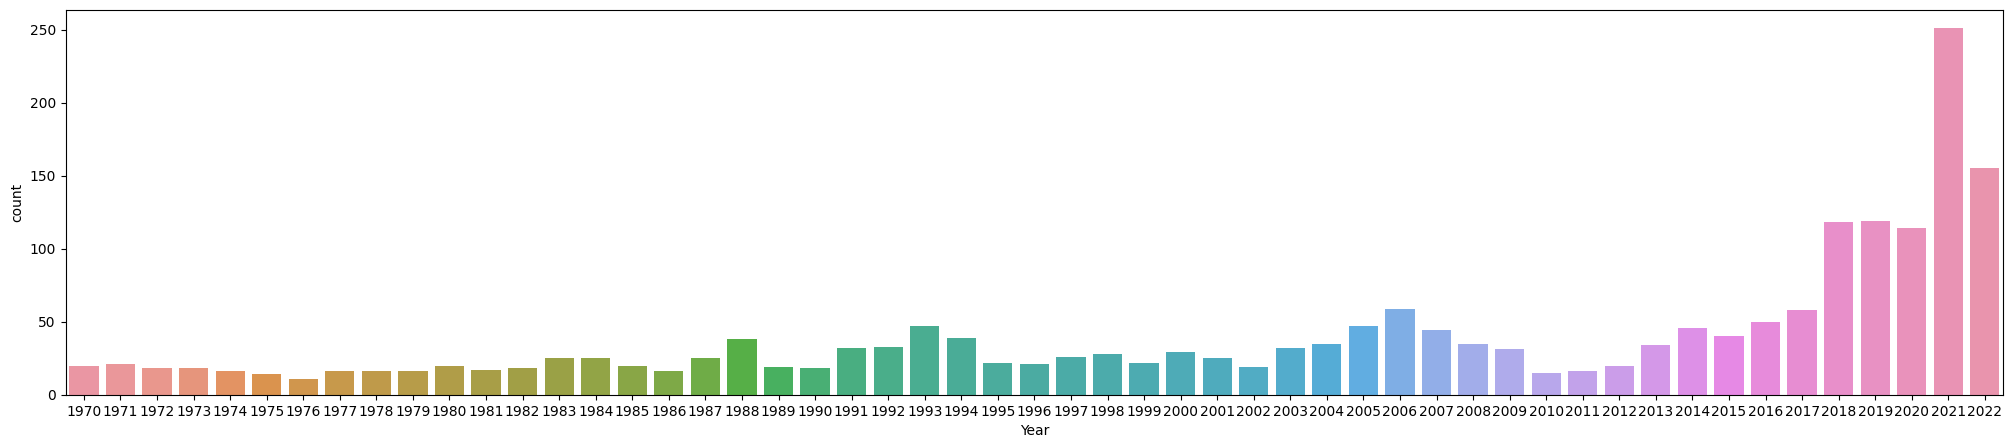

In [ ]:
fig = plt.figure(figsize=(25,5))
sns.countplot(x=df_incid["Year"])

In [ ]:
df_incid['Preplanned'] = df_incid['Preplanned'].fillna("Unknown")

In [ ]:
df_preplanned = df_incid.groupby(['Year', 'Preplanned']).size().unstack()
df_preplanned

Preplanned,No,Unknown,Yes
Year,,,
1970,19.0,1.0,NaN
1971,20.0,NaN,1.0
1972,16.0,1.0,1.0
1973,18.0,NaN,NaN
1974,13.0,NaN,3.0
1975,11.0,NaN,3.0
1976,11.0,NaN,NaN
1977,13.0,1.0,2.0
1978,14.0,1.0,1.0


In [ ]:
df_incid['Year'].value_counts().sort_values()

Text(0, 0.5, 'Número de acidentes')

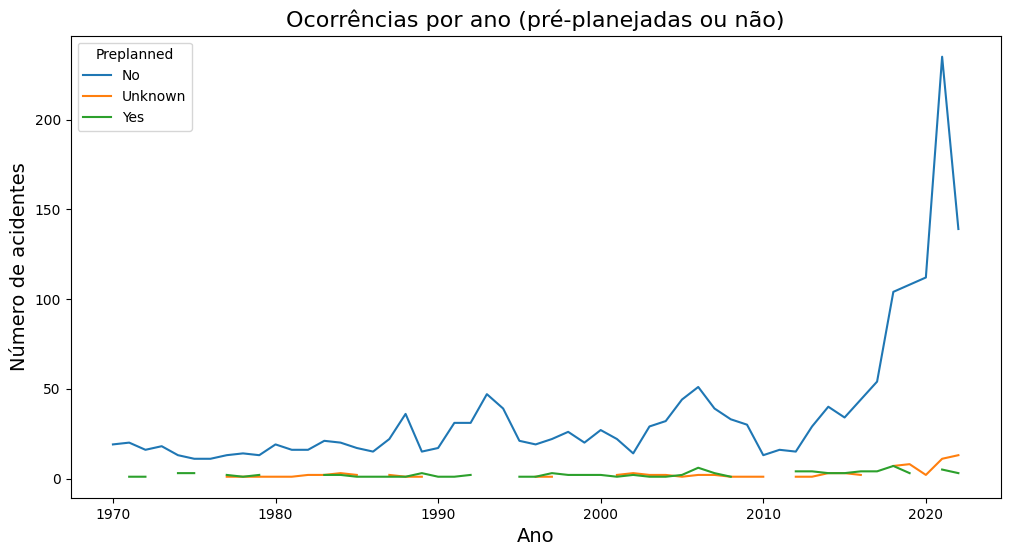

In [ ]:
ax = df_preplanned.plot(kind='line', figsize=(12, 6), rot=0);
ax.set_title('Ocorrências por ano (pré-planejadas ou não)', fontsize = 16)
ax.set_xlabel('Ano', fontsize=14)
ax.set_ylabel('Número de acidentes', fontsize=14)

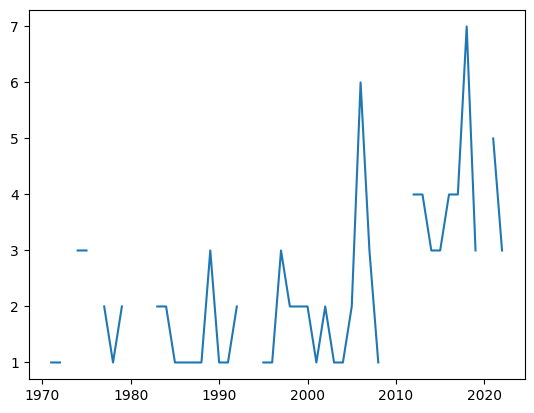

In [ ]:
plt.plot(df_preplanned['Yes'].index, df_preplanned['Yes'].values)

<Axes: ylabel='Preplanned'>

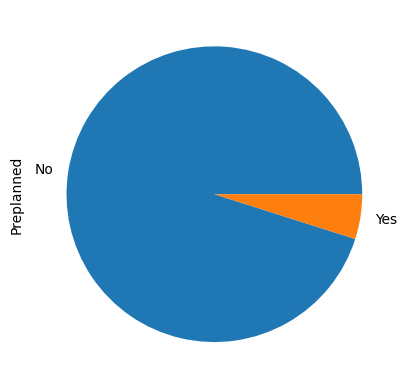

In [ ]:
df_incid['Preplanned'].value_counts().plot(kind='pie')

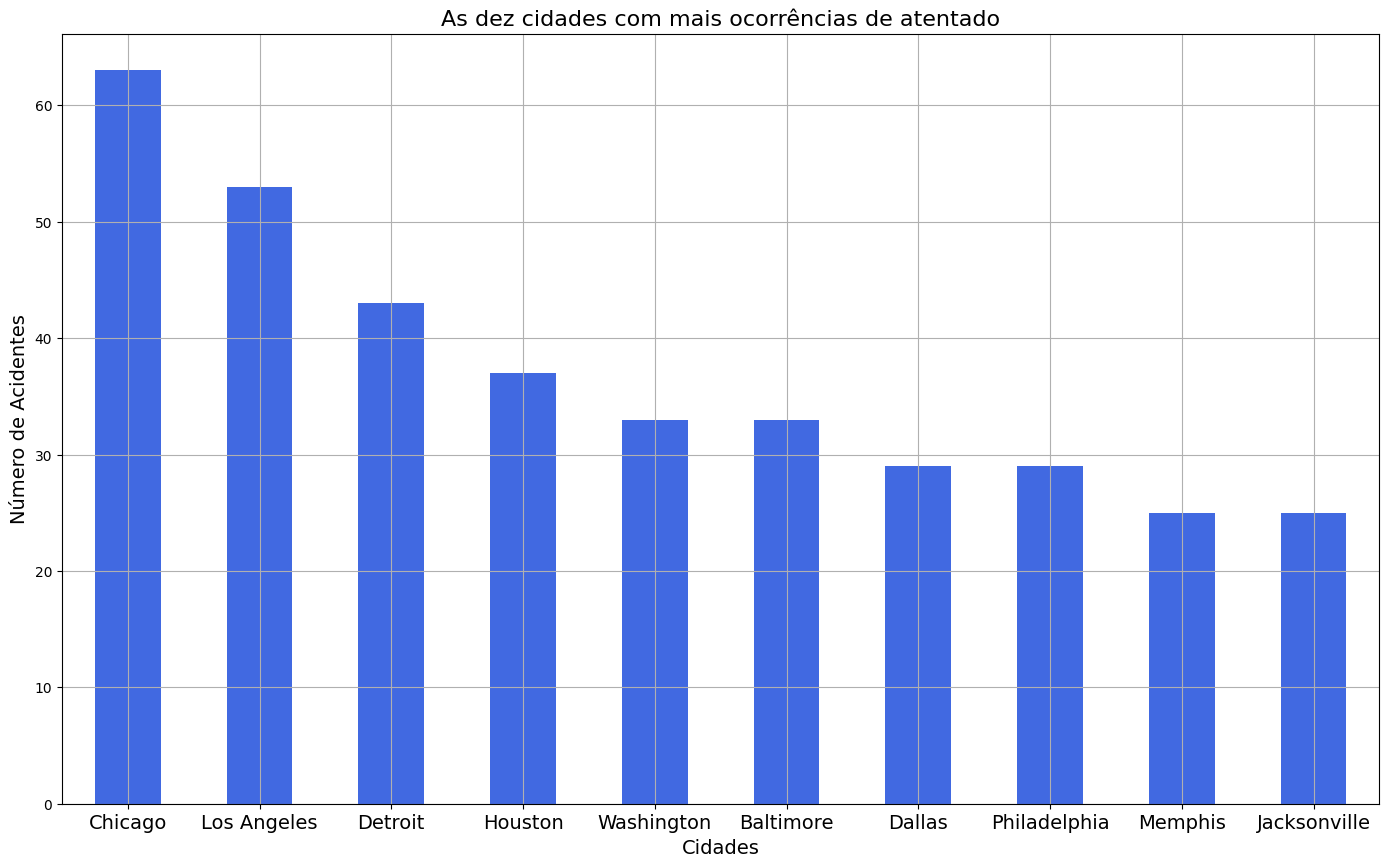

In [ ]:
plt.title('As dez cidades com mais ocorrências de atentado', fontsize = 16)
plt.ylabel('Número de Acidentes', fontsize=14)
plt.xlabel('Cidades', fontsize=14)
df_incid["City"].value_counts()[:10].plot(kind = 'bar', figsize=(17, 10), fontsize = 10, color = 'royalblue', grid = True);
plt.xticks(rotation = 0, fontsize=14)
plt.show()

In [ ]:
df_incid['Year'].head() # fazer dataframe com frequência do ano ?

0    2022
1    2022
2    2022
3    2022
4    2022
Name: Year, dtype: int64

In [ ]:
accident_quarter_df = df_incid.groupby(['Year', 'Quarter']).size().unstack()
accident_quarter_df

Quarter,Fall,Spring,Summer,Winter
Year,,,,
1970,8.0,5.0,2.0,5.0
1971,10.0,3.0,2.0,6.0
1972,7.0,4.0,NaN,7.0
1973,9.0,2.0,NaN,7.0
1974,7.0,4.0,NaN,5.0
1975,3.0,6.0,2.0,3.0
1976,2.0,3.0,1.0,5.0
1977,2.0,5.0,2.0,7.0
1978,3.0,7.0,2.0,4.0


Text(0.5, 0, 'Número de acidentes')

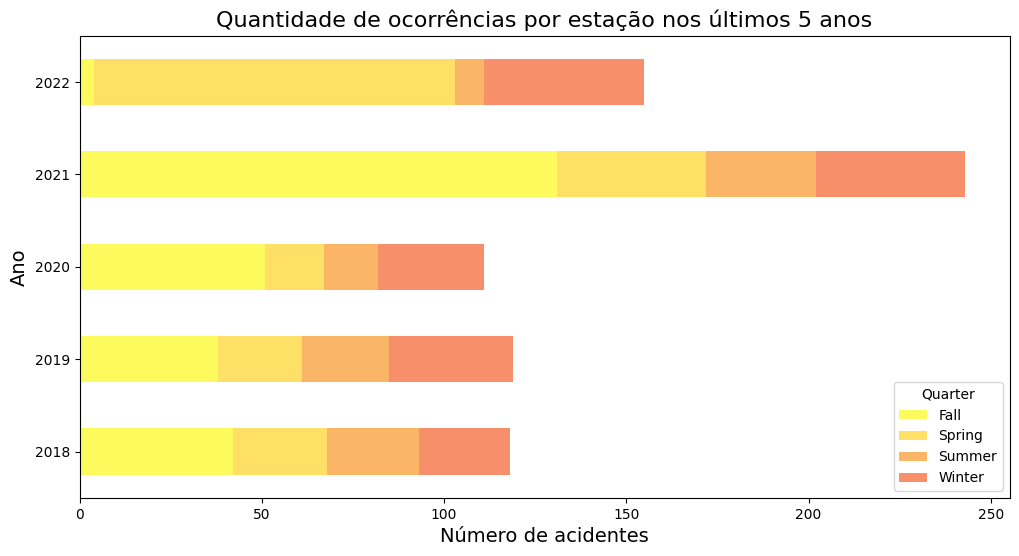

In [ ]:
ax = accident_quarter_df.tail().plot(kind='barh', stacked=True, figsize=(12, 6), color=['#fcfa5d', '#ffe066', '#fab666', '#f68f6a'], rot=0);
ax.set_title('Quantidade de ocorrências por estação nos últimos 5 anos', fontsize = 16)
ax.set_ylabel('Ano', fontsize=14)
ax.set_xlabel('Número de acidentes', fontsize=14)

In [ ]:
from shapely.geometry import Point, Polygon

In [ ]:
from osgeo import gdal
gdal.SetConfigOption('SHAPE_RESTORE_SHX', 'YES')

In [ ]:
states = gpd.read_file('/content/drive/MyDrive/usa_shape/USA_States.shp')

<Axes: >

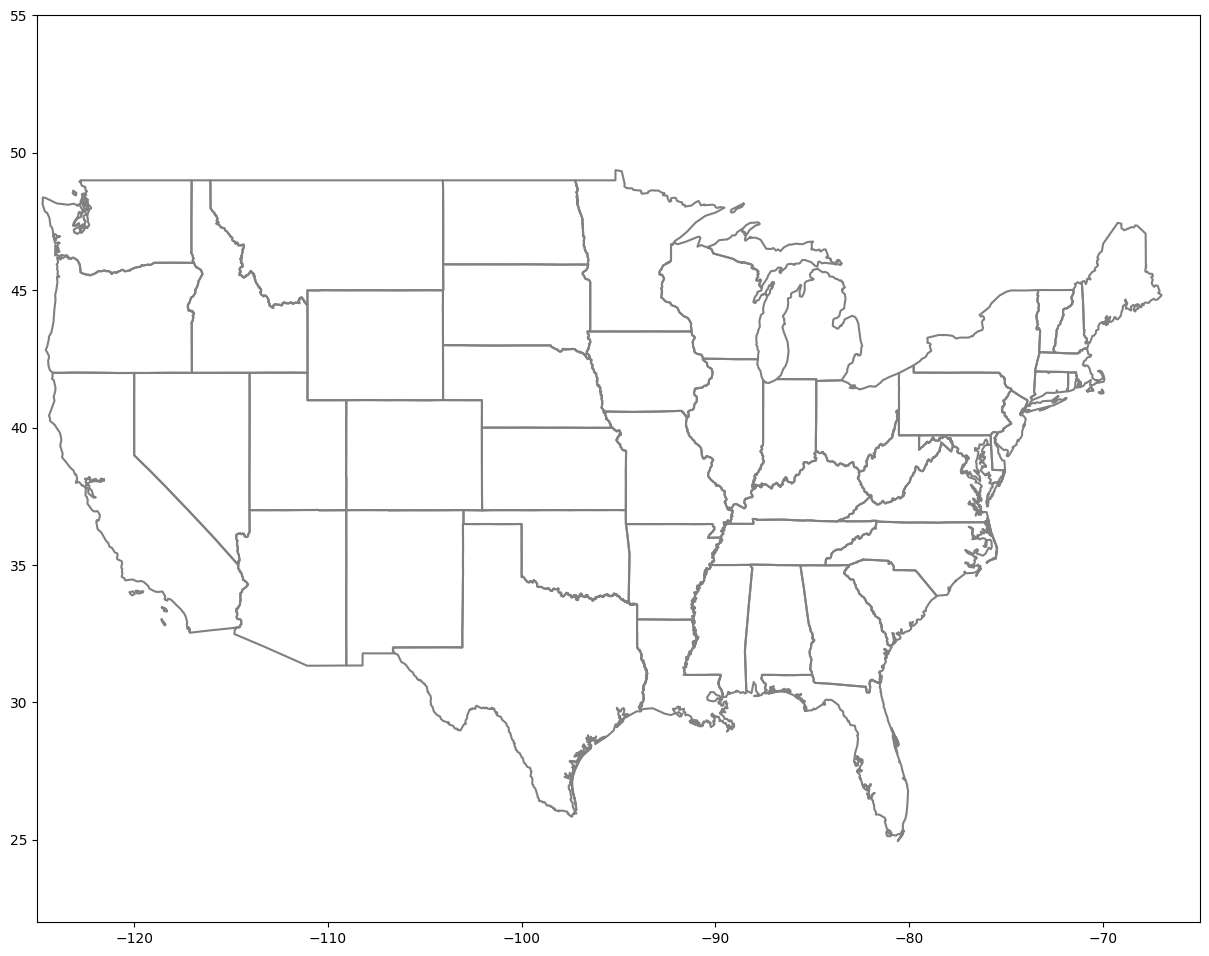

In [ ]:
fig, ax = plt.subplots(figsize=(15,15))
ax.set_xlim([-125,-65])
ax.set_ylim([22,55])
states.boundary.plot(ax=ax, color='grey')

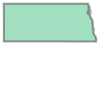

In [ ]:
states.iloc[3].geometry

In [ ]:
states.head()

,STATE_NAME,STATE_FIPS,STATE_ABBR,geometry
0,Washington,53,WA,"MULTIPOLYGON (((-122.40202 48.22522, -122.4628..."
1,Montana,30,MT,"POLYGON ((-111.47543 44.70216, -111.48080 44.6..."
2,Maine,23,ME,"MULTIPOLYGON (((-69.77728 44.07415, -69.85993 ..."
3,North Dakota,38,ND,"POLYGON ((-98.73044 45.93827, -99.00683 45.939..."
4,South Dakota,46,SD,"POLYGON ((-102.78838 42.99530, -103.00588 42.9..."


In [ ]:
states.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   STATE_NAME  51 non-null     object  
 1   STATE_FIPS  51 non-null     object  
 2   STATE_ABBR  51 non-null     object  
 3   geometry    51 non-null     geometry
dtypes: geometry(1), object(3)
memory usage: 1.7+ KB


In [ ]:
df_incid['State'].value_counts()

CA    215
TX    177
FL    120
IL    113
PA     88
MI     87
OH     86
NY     76
GA     72
NC     69
TN     68
MD     62
AL     61
LA     57
VA     50
WA     47
MO     47
SC     45
IN     40
DC     34
AR     29
CO     29
WI     26
MS     26
KY     24
OR     24
CT     23
NM     21
NJ     21
MN     20
AZ     19
OK     19
MA     19
KS     18
NV     18
UT     17
IA     17
NE     11
DE     11
MT      9
NH      8
RI      7
AK      6
ID      6
SD      5
WV      5
ME      5
VT      3
ND      3
HI      3
WY      2
VI      1
Name: State, dtype: int64

In [ ]:
data = gpd.GeoDataFrame(states, geometry=states['geometry'])
data.head()

,STATE_NAME,STATE_FIPS,STATE_ABBR,geometry
0,Washington,53,WA,"MULTIPOLYGON (((-122.40202 48.22522, -122.4628..."
1,Montana,30,MT,"POLYGON ((-111.47543 44.70216, -111.48080 44.6..."
2,Maine,23,ME,"MULTIPOLYGON (((-69.77728 44.07415, -69.85993 ..."
3,North Dakota,38,ND,"POLYGON ((-98.73044 45.93827, -99.00683 45.939..."
4,South Dakota,46,SD,"POLYGON ((-102.78838 42.99530, -103.00588 42.9..."


In [ ]:
data.rename(columns={'STATE_ABBR':'sigla'}, inplace=True)

#### Quantidade de incidentes por estado

In [ ]:
df_frequencia_uf = pd.DataFrame()
df_frequencia_uf["sigla"] = df_incid['State'].value_counts().index
df_frequencia_uf["quantidade"] = df_incid['State'].value_counts().values
df_frequencia_uf.head()

,sigla,quantidade
0,CA,215
1,TX,177
2,FL,120
3,IL,113
4,PA,88


<Axes: >

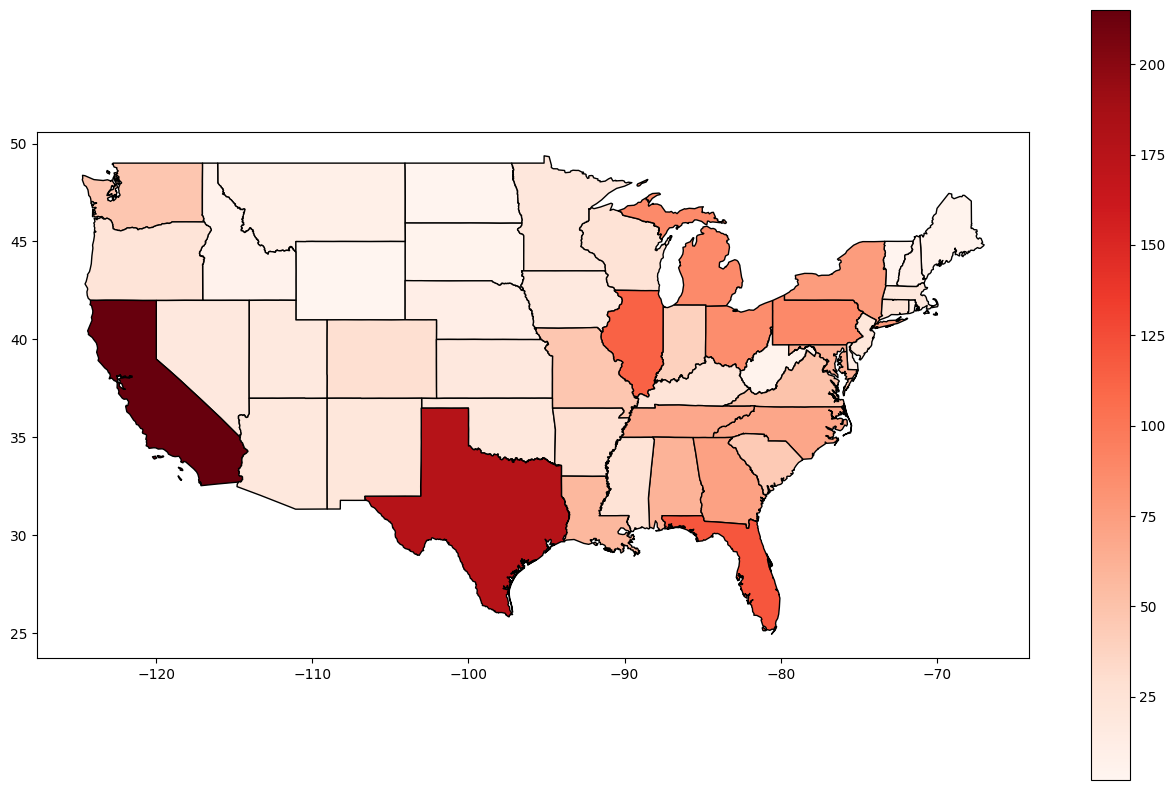

In [ ]:
data.drop(data.loc[data['sigla']=='AK'].index, inplace=True) #removendo alaska
data.drop(data.loc[data['sigla']=='HI'].index, inplace=True) #removendo havai
acidentes_geometria = data.merge(df_frequencia_uf, on="sigla", how="left")
acidentes_geometria.plot(column="quantidade", cmap="Reds", figsize=(16,10), legend=True, edgecolor="black")

#### Quantidade de vítimas por estado

In [ ]:
df_victm.rename(columns={'incidentid':'Incident_ID'}, inplace=True)

In [ ]:
df_victm = df_victm.merge(df_incid[['Incident_ID', 'State']], how = 'left')
df_victm

,Incident_ID,race,injury,gender,schoolaffiliation,age,State
0,20220620ILGRC,NaN,Wounded,Female,No Relation,34,IL
1,20220620ILGRC,NaN,Wounded,Male,No Relation,16,IL
2,20220620ILGRC,NaN,Wounded,Female,No Relation,17,IL
3,20220609ALWAG,Black,Fatal,Male,No Relation,32,AL
4,20220605INWEG,NaN,Wounded,Male,NaN,19,IN
...,...,...,...,...,...,...,...
3097,19700323CADAL,NaN,Wounded,Male,Student,16,CA
3098,19700206OHJOC,NaN,Wounded,Male,Student,18,OH
3099,19700105DCUNW,NaN,None,Male,Unknown,16,DC
3100,19700105DCSOW,NaN,Wounded,Male,Student,Teen,DC


In [ ]:
df_victm['State'].value_counts()

CA    418
TX    273
FL    174
IL    166
MI    148
PA    122
OH    105
NY     97
GA     86
CO     79
WY     78
TN     78
LA     76
NC     74
AL     74
MD     72
SC     68
WA     64
OR     62
VA     61
MO     58
KY     53
CT     52
AR     49
DC     48
IN     43
MS     39
MA     37
MN     36
KS     32
NJ     30
WI     29
NV     27
OK     24
NM     22
AZ     20
IA     18
UT     14
MT     12
DE     12
NE     12
NH     11
RI     10
ID      9
AK      9
ME      5
SD      5
WV      3
HI      3
ND      2
VT      2
VI      1
Name: State, dtype: int64

In [ ]:
df_vitimas_uf = pd.DataFrame()
df_vitimas_uf["sigla"] = df_victm['State'].value_counts().index
df_vitimas_uf["vitimas"] = df_victm['State'].value_counts().values
df_vitimas_uf.head()

,sigla,vitimas
0,CA,418
1,TX,273
2,FL,174
3,IL,166
4,MI,148


In [ ]:
vitimas_geometria = data.merge(df_vitimas_uf, on="sigla", how="left")
vitimas_geometria.plot(column="vitimas", cmap="Reds", figsize=(16,10), legend=True, edgecolor="black")

NameError: ignored

#### Quantidade de incidentes por estado por ano

In [ ]:
incid_2020 = pd.DataFrame()
incid_2020['sigla'] = df_incid['State'][df_incid['Year']==2020].value_counts().index
incid_2020['quantidade'] = df_incid['State'][df_incid['Year']==2020].value_counts().values
incid_2020.head()

<Axes: >

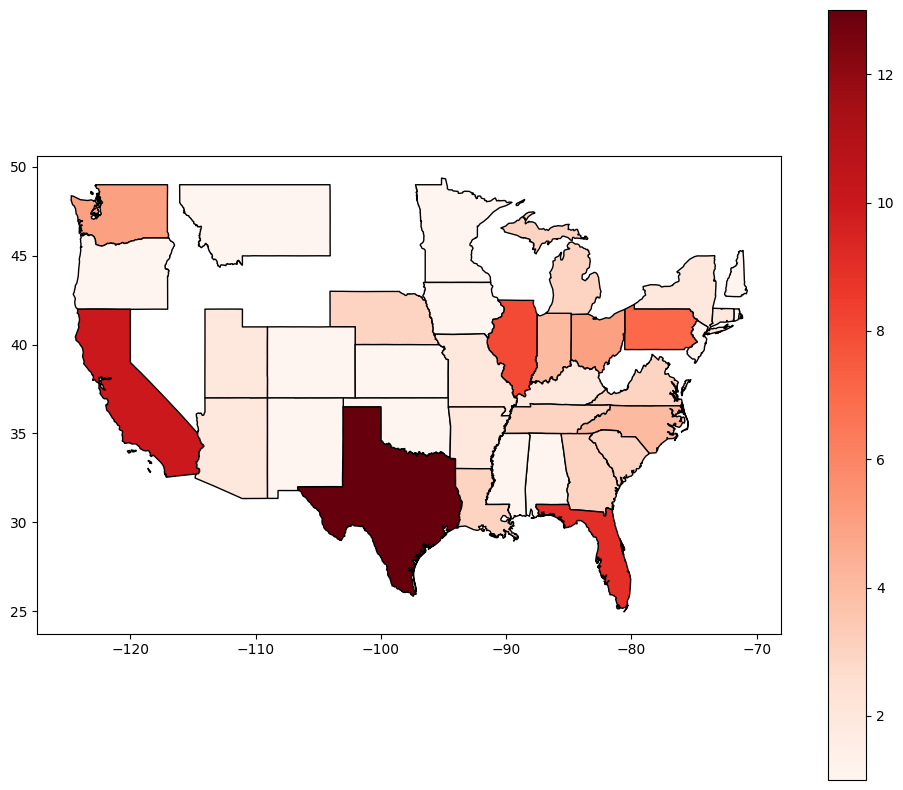

In [ ]:
geometria_2020 = data.merge(incid_2020, on="sigla", how="left")
geometria_2020.plot(column="quantidade", cmap="Reds", figsize=(12,10), legend=True, edgecolor="black")

#### Armas mais usadas por estado

In [ ]:
#Mudando o nome da coluna incidentid para Incident_ID do dataset de armas:
df_weapn.rename(columns={'incidentid': 'Incident_ID'}, inplace=True)
df_incid_ordenado = df_incid.sort_values('Incident_ID')
df_weapn_ordenado = df_weapn.sort_values('Incident_ID')

#Juntando os datasets
# df_incid_ordenado = df_incid_ordenado.drop_duplicates()
# duplicates = df_incid_ordenado[df_incid_ordenado.duplicated('Incident_ID')]
# print(duplicates)
# df_weapn_ordenado = df_weapn_ordenado.drop_duplicates()
# duplicates2 = df_weapn_ordenado[df_weapn_ordenado.duplicated('Incident_ID')]
# print(duplicates2)
#juntando os datasets
merged_df = pd.merge(df_incid_ordenado, df_weapn_ordenado, on='Incident_ID', how='left')
#merged_df = merged_df.drop_duplicates()  # verificar mais tarde
merged_df.head()

,Incident_ID,Sources,Number_News,Media_Attention,Reliability,Date,Quarter,School,City,State,...,Officer_Involved,Bullied,Domestic_Violence,Gang_Related,Preplanned,Shots_Fired,Active_Shooter_FBI,weaponcaliber,weapondetails,weapontype
0,19700105DCHIW,https://news.google.com/newspapers?id=AfRYAAAA...,NaN,NaN,3,1970-01-05,Winter,Hine Junior High School,Washington,DC,...,No,No,No,No,No,1,NaN,Unknown,NaN,Handgun
1,19700105DCSOW,https://news.google.com/newspapers?id=AfRYAAAA...,NaN,NaN,3,1970-01-05,Winter,Sousa Junior High,Washington,DC,...,No,No,No,No,No,1,NaN,.22 caliber,NaN,Handgun
2,19700105DCUNW,https://www.newspapers.com/image/156467116/?te...,NaN,NaN,2,1970-01-05,Winter,Unnamed High School,Washington,DC,...,No,No,No,No,No,2,NaN,Unknown,NaN,Handgun
3,19700206OHJOC,https://www.newspapers.com/image/18059538/?ter...,NaN,NaN,2,1970-02-06,Winter,John F. Kennedy High School,Cleveland,OH,...,No,No,No,No,No,4,NaN,Unknown,NaN,Handgun
4,19700226CABAB,https://www.vvdailypress.com/story/news/crime/...,2,Local,4,1979-02-26,Winter,Barstow High School,Barstow,CA,...,No,Yes,No,No,Yes,6,No,NaN,NaN,NaN


In [ ]:
# Lista o tipo de arma mais usado por cada estado
armas_por_estado = merged_df.groupby(['State', 'weapontype']).size().reset_index(name='count') # Qtd de armas usadas por estado

# Identificação do tipo de arma mais usado por estado
tipos_arma_mais_usados = armas_por_estado.groupby('State').apply(lambda x: x[x['count'] == x['count'].max()])

<Axes: >

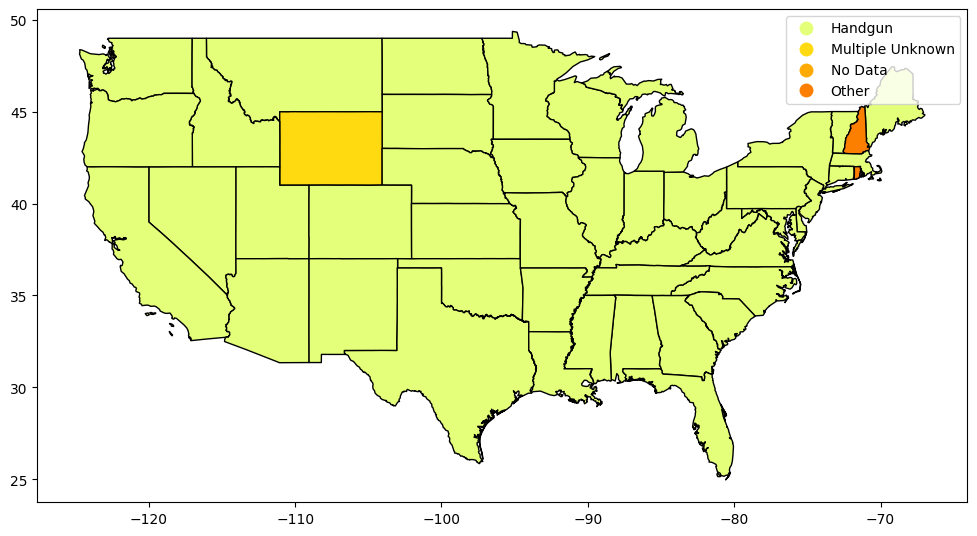

In [ ]:
tipos_arma_mais_usados.rename(columns={'State':'sigla'}, inplace=True)
armas_geometria = data.merge(tipos_arma_mais_usados, on="sigla", how="left")
armas_geometria.plot(column="weapontype", cmap="Wistia", figsize=(12,10), legend=True, edgecolor="black")

#### Mortos por estado

In [ ]:
filtro = df_victm['injury'] == 'Fatal'
fatal_victm = df_victm[filtro]

In [ ]:
df_mortos_uf = pd.DataFrame()
df_mortos_uf["sigla"] = fatal_victm['State'].value_counts().index
df_mortos_uf["mortos"] = fatal_victm['State'].value_counts().values
df_mortos_uf.head()

,sigla,mortos
0,CA,85
1,TX,73
2,FL,48
3,IL,33
4,CT,32


<Axes: >

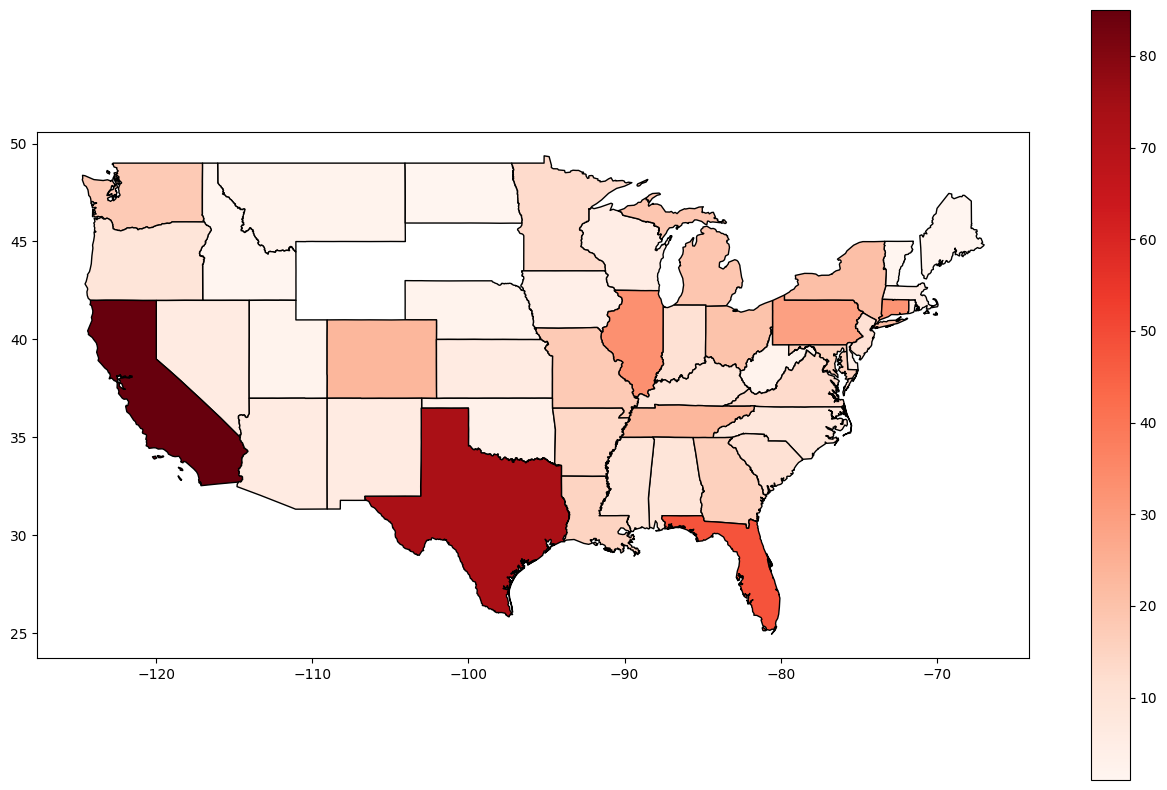

In [ ]:
mortos_geometria = data.merge(df_mortos_uf, on="sigla", how="left")
mortos_geometria.plot(column="mortos", cmap="Reds", figsize=(16,10), legend=True, edgecolor="black")

Ideias: Mortos por divisão, genero/raça/idade com maior frequencia de vitimas por estado,  

In [ ]:
df_victm['injury'].value_counts()

Wounded           1843
Fatal              684
None               481
Minor Injuries      94
Name: injury, dtype: int64

In [ ]:
import geopandas as gpd

show_maps = True
if show_maps:
  INFO_UFS = gpd.read_file(r"/s_08mr23.shp")

In [ ]:
if show_maps:
  acidentes_geometria = INFO_UFS.merge(df_frequencia_uf, on="sigla", how="left")
  acidentes_geometria.plot(column="quantidade", cmap="Reds", figsize=(16,10), legend=True, edgecolor="black")

### <font color ="#00b8ff">3.2 Análise dos Incidentes</font>

In [3]:
# nba_df.astype({'age': int})

In [4]:
df_incid.merge(df_victm, how='cross')

,Incident_ID,Sources,Number_News,Media_Attention,Reliability,Date,Quarter,School,City,State,...,Gang_Related,Preplanned,Shots_Fired,Active_Shooter_FBI,incidentid,race,injury,gender,schoolaffiliation,age
0,20220620ILGRC,https://www.cbsnews.com/chicago/news/woman-and...,50,National,4,2022-06-20,Summer,Gresham School of Excellence,Chicago,IL,...,NaN,No,100,No,20220620ILGRC,NaN,Wounded,Female,No Relation,34
1,20220620ILGRC,https://www.cbsnews.com/chicago/news/woman-and...,50,National,4,2022-06-20,Summer,Gresham School of Excellence,Chicago,IL,...,NaN,No,100,No,20220620ILGRC,NaN,Wounded,Male,No Relation,16
2,20220620ILGRC,https://www.cbsnews.com/chicago/news/woman-and...,50,National,4,2022-06-20,Summer,Gresham School of Excellence,Chicago,IL,...,NaN,No,100,No,20220620ILGRC,NaN,Wounded,Female,No Relation,17
3,20220620ILGRC,https://www.cbsnews.com/chicago/news/woman-and...,50,National,4,2022-06-20,Summer,Gresham School of Excellence,Chicago,IL,...,NaN,No,100,No,20220609ALWAG,Black,Fatal,Male,No Relation,32
4,20220620ILGRC,https://www.cbsnews.com/chicago/news/woman-and...,50,National,4,2022-06-20,Summer,Gresham School of Excellence,Chicago,IL,...,NaN,No,100,No,20220605INWEG,NaN,Wounded,Male,NaN,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6411826,19700105DCHIW,https://news.google.com/newspapers?id=AfRYAAAA...,NaN,NaN,3,1970-01-05,Winter,Hine Junior High School,Washington,DC,...,No,No,1,NaN,19700323CADAL,NaN,Wounded,Male,Student,16
6411827,19700105DCHIW,https://news.google.com/newspapers?id=AfRYAAAA...,NaN,NaN,3,1970-01-05,Winter,Hine Junior High School,Washington,DC,...,No,No,1,NaN,19700206OHJOC,NaN,Wounded,Male,Student,18
6411828,19700105DCHIW,https://news.google.com/newspapers?id=AfRYAAAA...,NaN,NaN,3,1970-01-05,Winter,Hine Junior High School,Washington,DC,...,No,No,1,NaN,19700105DCUNW,NaN,None,Male,Unknown,16
6411829,19700105DCHIW,https://news.google.com/newspapers?id=AfRYAAAA...,NaN,NaN,3,1970-01-05,Winter,Hine Junior High School,Washington,DC,...,No,No,1,NaN,19700105DCSOW,NaN,Wounded,Male,Student,Teen


In [5]:
df_incid.head()

,Incident_ID,Sources,Number_News,Media_Attention,Reliability,Date,Quarter,School,City,State,...,Accomplice,Hostages,Barricade,Officer_Involved,Bullied,Domestic_Violence,Gang_Related,Preplanned,Shots_Fired,Active_Shooter_FBI
0,20220620ILGRC,https://www.cbsnews.com/chicago/news/woman-and...,50,National,4,2022-06-20,Summer,Gresham School of Excellence,Chicago,IL,...,No,No,No,No,No,No,NaN,No,100,No
1,20220613WAMAE,https://www.q13fox.com/news/deputies-arrest-15...,5,Local,4,2022-06-13,Summer,Mariner High School,Everett,WA,...,No,No,No,No,No,No,NaN,No,99,No
2,20220610ALBYB,https://www.actionnews5.com/2022/06/10/student...,3,Local,4,2022-06-10,Summer,Byhalia High School,Byhalia,MS,...,NaN,No,No,No,No,No,NaN,No,1,No
3,20220609ALWAG,https://www.live5news.com/2022/06/09/potential...,100,National,4,2022-06-09,Summer,Walnut Park Elementary School,Gadsden,AL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
4,20220608ARLIL,https://www.kark.com/crime/lrpd-school-bus-hit...,5,National,4,2022-06-08,Summer,Little Rock School District Bus,Little Rock,AR,...,NaN,No,No,No,No,No,NaN,No,99,No


In [6]:
df_incid['Date'] = pd.to_datetime(df_incid['Date'], format='%Y-%m-%d')

df_incid['Year'] = df_incid['Date'].dt.year

df_incid['Year'].value_counts()

2021    251
2022    155
2019    119
2018    118
2020    114
2006     59
2017     58
2016     50
1993     47
2005     47
2014     46
2007     44
2015     40
1994     39
1988     38
2008     35
2004     35
2013     34
1992     33
2003     32
1991     32
2009     31
2000     29
1998     28
1997     26
1987     25
2001     25
1984     25
1983     25
1999     22
1995     22
1971     21
1996     21
1970     20
1985     20
2012     20
1980     20
1989     19
2002     19
1982     18
1990     18
1973     18
1972     18
1981     17
2011     16
1986     16
1978     16
1977     16
1974     16
1979     16
2010     15
1975     14
1976     11
Name: Year, dtype: int64

<Axes: >

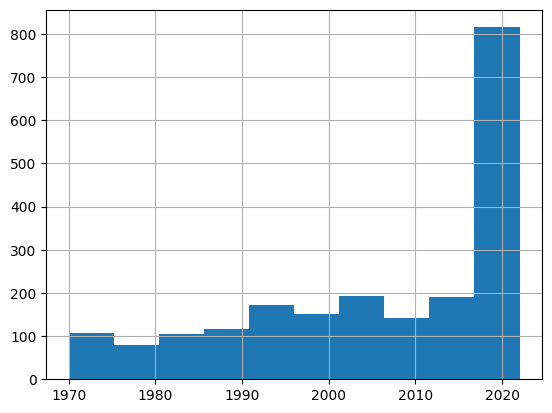

In [7]:
df_incid['Year'].hist()

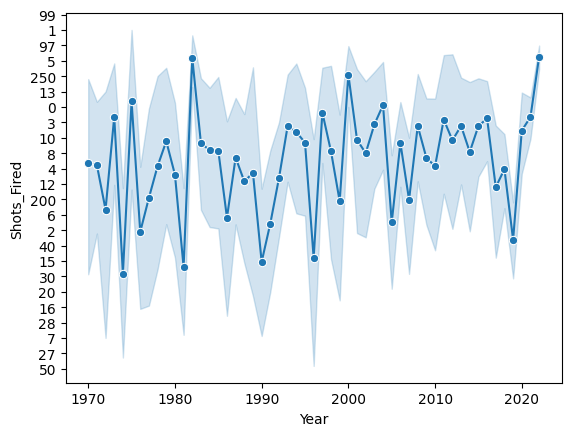

In [8]:
graf_linha = sns.lineplot(data=df_incid, x='Year', y='Shots_Fired', marker='o')

In [9]:
df_incid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2069 entries, 0 to 2068
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Incident_ID         2069 non-null   object        
 1   Sources             2069 non-null   object        
 2   Number_News         694 non-null    object        
 3   Media_Attention     734 non-null    object        
 4   Reliability         2069 non-null   int64         
 5   Date                2069 non-null   datetime64[ns]
 6   Quarter             2058 non-null   object        
 7   School              2068 non-null   object        
 8   City                2069 non-null   object        
 9   State               2069 non-null   object        
 10  School_Level        2045 non-null   object        
 11  Location            2066 non-null   object        
 12  Location_Type       2064 non-null   object        
 13  During_School       2047 non-null   object      

In [10]:
df_incid['First_Shot'].value_counts()

12:00 PM    38
3:00 PM     37
8:00 AM     37
9:00 AM     34
15:00:00    31
            ..
17:12:00     1
20:18:00     1
03:06:00     1
21:18:00     1
10:19 AM     1
Name: First_Shot, Length: 491, dtype: int64

In [11]:
df_incid['Situation']

0                             NaN
1           Escalation of Dispute
2           Escalation of Dispute
3       Officer-Involved Shooting
4                             NaN
                  ...            
2064        Escalation of Dispute
2065        Escalation of Dispute
2066             Illegal Activity
2067                   Accidental
2068                   Accidental
Name: Situation, Length: 2069, dtype: object

In [12]:
ano_plan = df_incid.groupby('Year')['Preplanned'].value_counts()
ano_plan

Year  Preplanned
1970  No             19
1971  No             20
      Yes             1
1972  No             16
      Yes             1
                   ... 
2020  No            112
2021  No            235
      Yes             5
2022  No            139
      Yes             3
Name: Preplanned, Length: 95, dtype: int64

<Axes: xlabel='Reliability'>

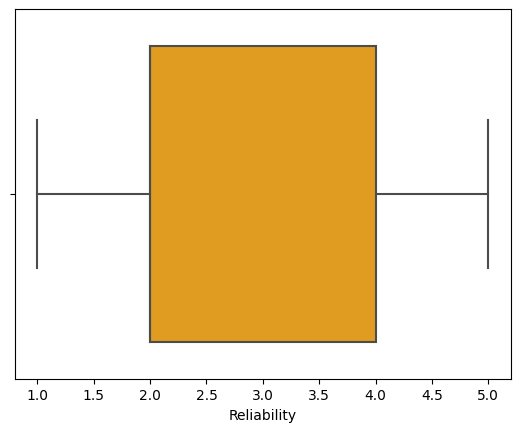

In [13]:
sns.boxplot(data=df_incid, x='Reliability', color='orange')

### <font color ="#00b8ff">3.3 Análise do Violentador</font>

In [14]:
df_shoot.head()

,incidentid,age,gender,race,schoolaffiliation,shooteroutcome,shooterdied,injury,chargesfiled,verdict,minorchargedadult,criminalhistory
0,20220620ILGRC,NaN,NaN,NaN,No Relation,Fled/Escaped,No,None,NaN,NaN,NaN,NaN
1,20220613WAMAE,15,Male,NaN,Student,Fled/Apprehended,No,None,"unlawful possession of a firearm, disturbing s...",NaN,NaN,NaN
2,20220610ALBYB,Teen,Male,NaN,Student,Fled/Apprehended,No,None,NaN,NaN,NaN,NaN
3,20220609ALWAG,NaN,NaN,NaN,Police Officer/SRO,Law Enforcement,No,None,NaN,NaN,NaN,NaN
4,20220608ARLIL,NaN,NaN,NaN,No Relation,Fled/Escaped,No,None,NaN,NaN,NaN,NaN


In [15]:
df_shoot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2294 entries, 0 to 2293
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   incidentid         2294 non-null   object
 1   age                1865 non-null   object
 2   gender             1928 non-null   object
 3   race               643 non-null    object
 4   schoolaffiliation  2151 non-null   object
 5   shooteroutcome     2289 non-null   object
 6   shooterdied        2285 non-null   object
 7   injury             2286 non-null   object
 8   chargesfiled       706 non-null    object
 9   verdict            182 non-null    object
 10  minorchargedadult  243 non-null    object
 11  criminalhistory    186 non-null    object
dtypes: object(12)
memory usage: 215.2+ KB


In [ ]:
df_shoot['gender'].value_counts()

Male           1838
Female           87
Multiple          2
Transgender       1
Name: gender, dtype: int64

In [16]:
novas_colunas = pd.get_dummies(df_shoot['gender']) 
df_shoot2 = pd.concat([df_shoot,novas_colunas], axis=1) # axis = 1 concatena colunas. axis = 0 concatena linhas
df_shoot2.head(3)

,incidentid,age,gender,race,schoolaffiliation,shooteroutcome,shooterdied,injury,chargesfiled,verdict,minorchargedadult,criminalhistory,Female,Male,Multiple,Transgender
0,20220620ILGRC,NaN,NaN,NaN,No Relation,Fled/Escaped,No,None,NaN,NaN,NaN,NaN,0,0,0,0
1,20220613WAMAE,15,Male,NaN,Student,Fled/Apprehended,No,None,"unlawful possession of a firearm, disturbing s...",NaN,NaN,NaN,0,1,0,0
2,20220610ALBYB,Teen,Male,NaN,Student,Fled/Apprehended,No,None,NaN,NaN,NaN,NaN,0,1,0,0


In [17]:
injuries = pd.get_dummies(df_shoot['injury']) 
df_shoot2 = pd.concat([df_shoot2,injuries], axis=1) # axis = 1 concatena colunas. axis = 0 concatena linhas
df_shoot2.head(3)

,incidentid,age,gender,race,schoolaffiliation,shooteroutcome,shooterdied,injury,chargesfiled,verdict,minorchargedadult,criminalhistory,Female,Male,Multiple,Transgender,Fatal,None,Suicide,Wounded
0,20220620ILGRC,NaN,NaN,NaN,No Relation,Fled/Escaped,No,None,NaN,NaN,NaN,NaN,0,0,0,0,0,1,0,0
1,20220613WAMAE,15,Male,NaN,Student,Fled/Apprehended,No,None,"unlawful possession of a firearm, disturbing s...",NaN,NaN,NaN,0,1,0,0,0,1,0,0
2,20220610ALBYB,Teen,Male,NaN,Student,Fled/Apprehended,No,None,NaN,NaN,NaN,NaN,0,1,0,0,0,1,0,0


In [18]:
racas = pd.get_dummies(df_shoot['race']) 
df_shoot2 = pd.concat([df_shoot2,racas], axis=1) # axis = 1 concatena colunas. axis = 0 concatena linhas
df_shoot2.head(3)

,incidentid,age,gender,race,schoolaffiliation,shooteroutcome,shooterdied,injury,chargesfiled,verdict,...,Suicide,Wounded,Asian,Black,Hawaiian/Pacific Islander,Hispanic,Middle Eastern,Native American/Alaska Native,Other,White
0,20220620ILGRC,NaN,NaN,NaN,No Relation,Fled/Escaped,No,None,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
1,20220613WAMAE,15,Male,NaN,Student,Fled/Apprehended,No,None,"unlawful possession of a firearm, disturbing s...",NaN,...,0,0,0,0,0,0,0,0,0,0
2,20220610ALBYB,Teen,Male,NaN,Student,Fled/Apprehended,No,None,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0


In [19]:
died = pd.get_dummies(df_shoot['shooterdied']) 
df_shoot2 = pd.concat([df_shoot2,died], axis=1) # axis = 1 concatena colunas. axis = 0 concatena linhas
df_shoot2.head(3)

,incidentid,age,gender,race,schoolaffiliation,shooteroutcome,shooterdied,injury,chargesfiled,verdict,...,Asian,Black,Hawaiian/Pacific Islander,Hispanic,Middle Eastern,Native American/Alaska Native,Other,White,No,Yes
0,20220620ILGRC,NaN,NaN,NaN,No Relation,Fled/Escaped,No,None,NaN,NaN,...,0,0,0,0,0,0,0,0,1,0
1,20220613WAMAE,15,Male,NaN,Student,Fled/Apprehended,No,None,"unlawful possession of a firearm, disturbing s...",NaN,...,0,0,0,0,0,0,0,0,1,0
2,20220610ALBYB,Teen,Male,NaN,Student,Fled/Apprehended,No,None,NaN,NaN,...,0,0,0,0,0,0,0,0,1,0


In [20]:
df_shoot2.drop(['race', 'gender', 'injury', 'shooterdied'], axis=1, inplace=True)

In [21]:
df_shoot2.drop(['incidentid', 'age', 'schoolaffiliation', 'shooteroutcome', 'chargesfiled', 'verdict', 'minorchargedadult', 'criminalhistory'], axis=1, inplace=True)

In [22]:
df_shoot2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2294 entries, 0 to 2293
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   Female                         2294 non-null   uint8
 1   Male                           2294 non-null   uint8
 2   Multiple                       2294 non-null   uint8
 3   Transgender                    2294 non-null   uint8
 4   Fatal                          2294 non-null   uint8
 5   None                           2294 non-null   uint8
 6   Suicide                        2294 non-null   uint8
 7   Wounded                        2294 non-null   uint8
 8   Asian                          2294 non-null   uint8
 9   Black                          2294 non-null   uint8
 10  Hawaiian/Pacific Islander      2294 non-null   uint8
 11  Hispanic                       2294 non-null   uint8
 12  Middle Eastern                 2294 non-null   uint8
 13  Native American/Al

## Tipo 1

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import numpy as np

In [24]:
scaler =StandardScaler()
 
features =scaler.fit(df_shoot2)
features =features.transform(df_shoot2)
 
# Convert to pandas Dataframe
scaled_df =pd.DataFrame(features,columns=df_shoot2.columns)
# Print the scaled data
scaled_df.head(2)

,Female,Male,Multiple,Transgender,Fatal,None,Suicide,Wounded,Asian,Black,Hawaiian/Pacific Islander,Hispanic,Middle Eastern,Native American/Alaska Native,Other,White,No,Yes
0,-0.198545,-2.007661,-0.02954,-0.020883,-0.117041,0.414973,-0.302228,-0.220105,-0.075493,-0.398228,-0.02954,-0.186364,-0.020883,-0.036187,-0.051209,-0.331393,0.334623,-0.327327
1,-0.198545,0.498092,-0.02954,-0.020883,-0.117041,0.414973,-0.302228,-0.220105,-0.075493,-0.398228,-0.02954,-0.186364,-0.020883,-0.036187,-0.051209,-0.331393,0.334623,-0.327327


In [25]:
X = scaled_df.values

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

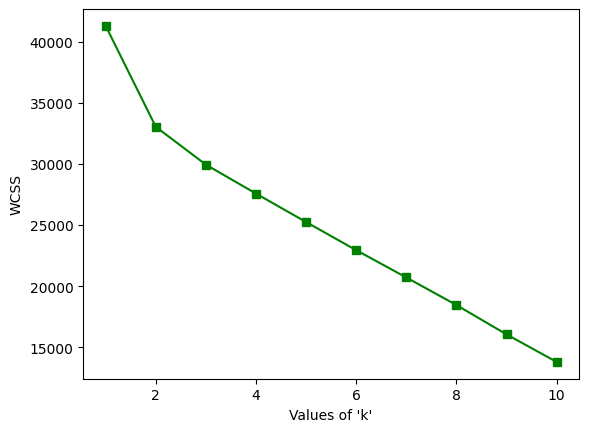

In [26]:
wcss = {}
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss[i] = kmeans.inertia_
     
plt.plot(wcss.keys(), wcss.values(), 'gs-')
plt.xlabel("Values of 'k'")
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans=KMeans(n_clusters=3, n_init="auto")
kmeans.fit(X)

In [28]:
pca=PCA(n_components=2)
 
reduced_X=pd.DataFrame(data=pca.fit_transform(X),columns=['PCA1','PCA2'])
 
#Reduced Features
reduced_X.head()

,PCA1,PCA2
0,-0.800606,1.179262
1,-0.708265,-0.381299
2,-0.708265,-0.381299
3,-0.800606,1.179262
4,-0.800606,1.179262


In [29]:
centers=pca.transform(kmeans.cluster_centers_)
 
# reduced centers
centers

array([[-0.6983    , -0.06162963],
       [ 5.74529055, -0.30065957],
       [ 0.85811037,  1.7749935 ]])

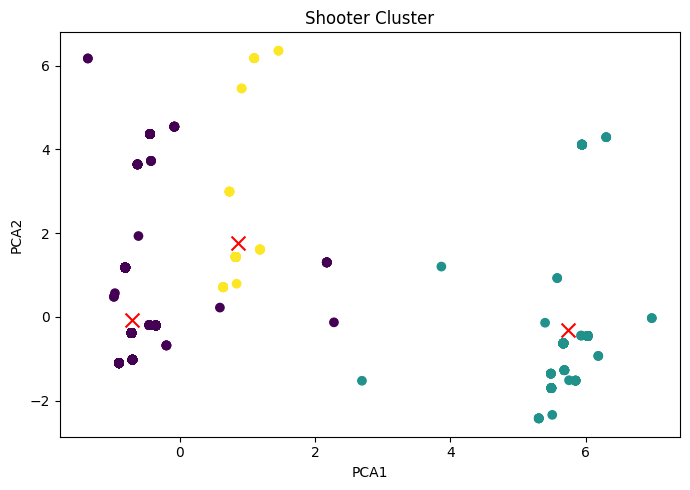

In [30]:
plt.figure(figsize=(7,5))
 
# Scatter plot
plt.scatter(reduced_X['PCA1'],reduced_X['PCA2'],c=kmeans.labels_)
plt.scatter(centers[:,0],centers[:,1],marker='x',s=100,c='red')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Shooter Cluster')
plt.tight_layout()

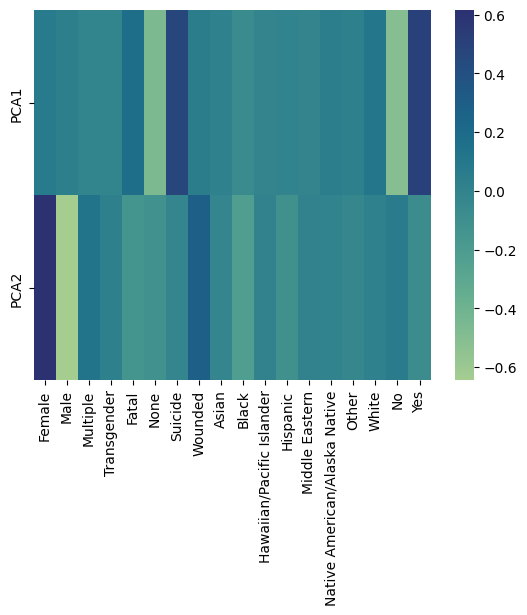

In [31]:
component_df=pd.DataFrame(pca.components_,index=['PCA1',"PCA2"],columns=df_shoot2.columns)
# Heat map
sns.heatmap(component_df, cmap="crest")
plt.show()

## Tipo 2

In [32]:
pca = PCA(2)
data = pca.fit_transform(df_shoot2)

In [33]:
model1 = KMeans(n_clusters = 4, init = "k-means++")
label = model1.fit_predict(data)
print(label)

[0 1 1 ... 1 1 1]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


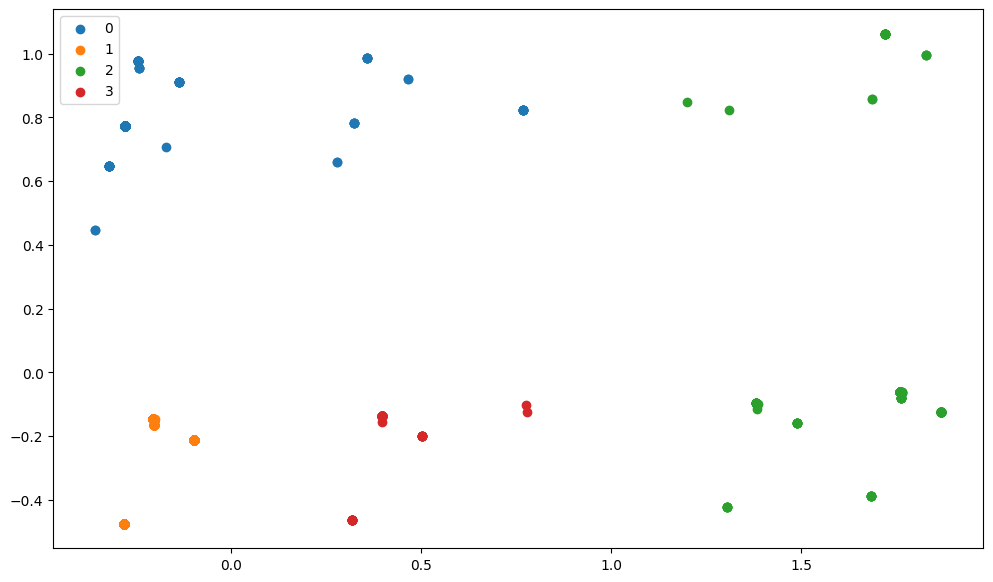

In [34]:
plt.figure(figsize=(12,7))
uniq = np.unique(label)
for i in uniq:
  plt.scatter(data[label == i , 0] , data[label == i , 1] , label = i)
  
plt.legend()
plt.show()

In [35]:
model2 = KMeans(n_clusters = 6, init = "k-means++")
y2 = model2.fit_predict(df_shoot2)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [36]:
label2 = model2.fit_predict(data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


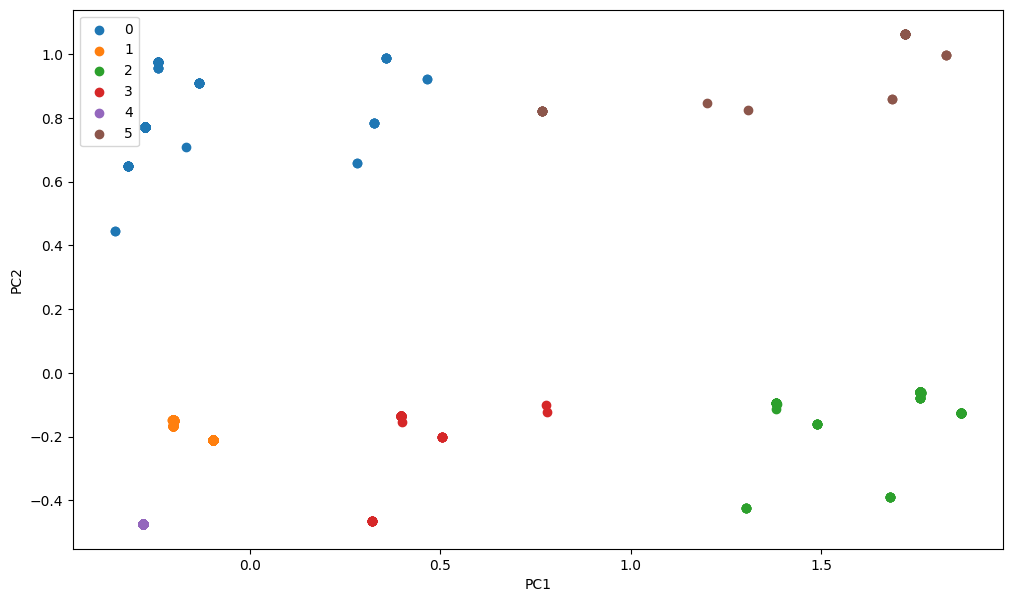

In [37]:
plt.figure(figsize=(12,7))
uniq = np.unique(label2)
for i in uniq:
  plt.scatter(data[label2 == i , 0] , data[label2 == i , 1] , label = i)
plt.xlabel([])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

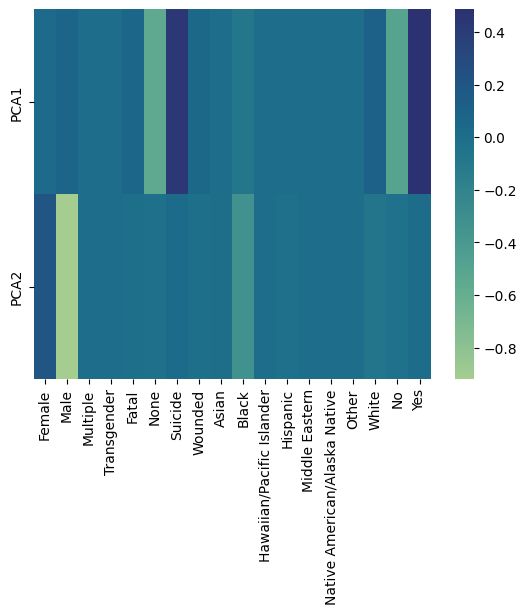

In [39]:
component_df=pd.DataFrame(pca.components_,index=['PCA1',"PCA2"],columns=df_shoot2.columns)
# Heat map
sns.heatmap(component_df, cmap="crest")
plt.show()

In [ ]:
scaler = StandardScaler
segmentation_std = scaler.fit_transform(df_shoot2)

TypeError: ignored

In [ ]:
plt.scatter(df_shoot2[''], df_shoot[''])

In [ ]:
df_shoot['race'].value_counts()

Black                            314
White                            227
Hispanic                          77
Asian                             13
Other                              6
Native American/Alaska Native      3
Hawaiian/Pacific Islander          2
Middle Eastern                     1
Name: race, dtype: int64

### <font color ="#00b8ff">3.4 Análise das Vítimas</font>

In [ ]:
df_victm.head()

,incidentid,race,injury,gender,schoolaffiliation,age
0,20220620ILGRC,NaN,Wounded,Female,No Relation,34
1,20220620ILGRC,NaN,Wounded,Male,No Relation,16
2,20220620ILGRC,NaN,Wounded,Female,No Relation,17
3,20220609ALWAG,Black,Fatal,Male,No Relation,32
4,20220605INWEG,NaN,Wounded,Male,NaN,19


In [ ]:
df_victm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3099 entries, 0 to 3098
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   incidentid         3099 non-null   object
 1   race               317 non-null    object
 2   injury             3099 non-null   object
 3   gender             2395 non-null   object
 4   schoolaffiliation  2775 non-null   object
 5   age                2817 non-null   object
dtypes: object(6)
memory usage: 145.4+ KB


In [ ]:
df_victm.describe()

,incidentid,race,injury,gender,schoolaffiliation,age
count,3099,317,3099,2395,2775,2817
unique,1868,5,4,3,19,74
top,19860516WYCOC,Black,Wounded,Male,Student,Teen
freq,74,153,1840,1809,1885,535


In [ ]:
race_victm = df_victm.groupby(['incidentid' ,'race']).size().unstack()
race_victm = race_victm.fillna(0)
race_victm

race,Asian,Black,Hispanic,Unknown,White
incidentid,,,,,
19700415ARPIP,0.0,6.0,0.0,0.0,0.0
19700422DEPIW,0.0,1.0,0.0,0.0,0.0
19700828TXRIE,0.0,0.0,1.0,0.0,0.0
19700831FLALM,0.0,0.0,1.0,0.0,0.0
19700914TNHAN,0.0,3.0,0.0,0.0,0.0
...,...,...,...,...,...
20220307IAEAD,0.0,0.0,1.0,0.0,0.0
20220331SCTAG,0.0,1.0,0.0,0.0,0.0
20220426GASOM,0.0,1.0,0.0,0.0,0.0


In [ ]:
victm = df_victm['Incident_ID'].value_counts()
victm_incid = victm.to_frame()
victm_incid

,Incident_ID
19860516WYCOC,74
20220524TXROU,39
19990420COCOL,37
19890117CACLS,35
20180214FLMAP,34
...,...
20150126MNHAR,1
20150215CATEM,1
20150330MOPEU,1
20150417TXSES,1


In [ ]:
victm_incid.rename(columns={'Incident_ID':'victims'}, inplace=True)
victm_incid['Incident_ID'] = victm_incid.index
victm_incid

,victims,Incident_ID
19860516WYCOC,74,19860516WYCOC
20220524TXROU,39,20220524TXROU
19990420COCOL,37,19990420COCOL
19890117CACLS,35,19890117CACLS
20180214FLMAP,34,20180214FLMAP
...,...,...
20150126MNHAR,1,20150126MNHAR
20150215CATEM,1,20150215CATEM
20150330MOPEU,1,20150330MOPEU
20150417TXSES,1,20150417TXSES


<Axes: xlabel='Incidentes', ylabel='Número de vítimas'>

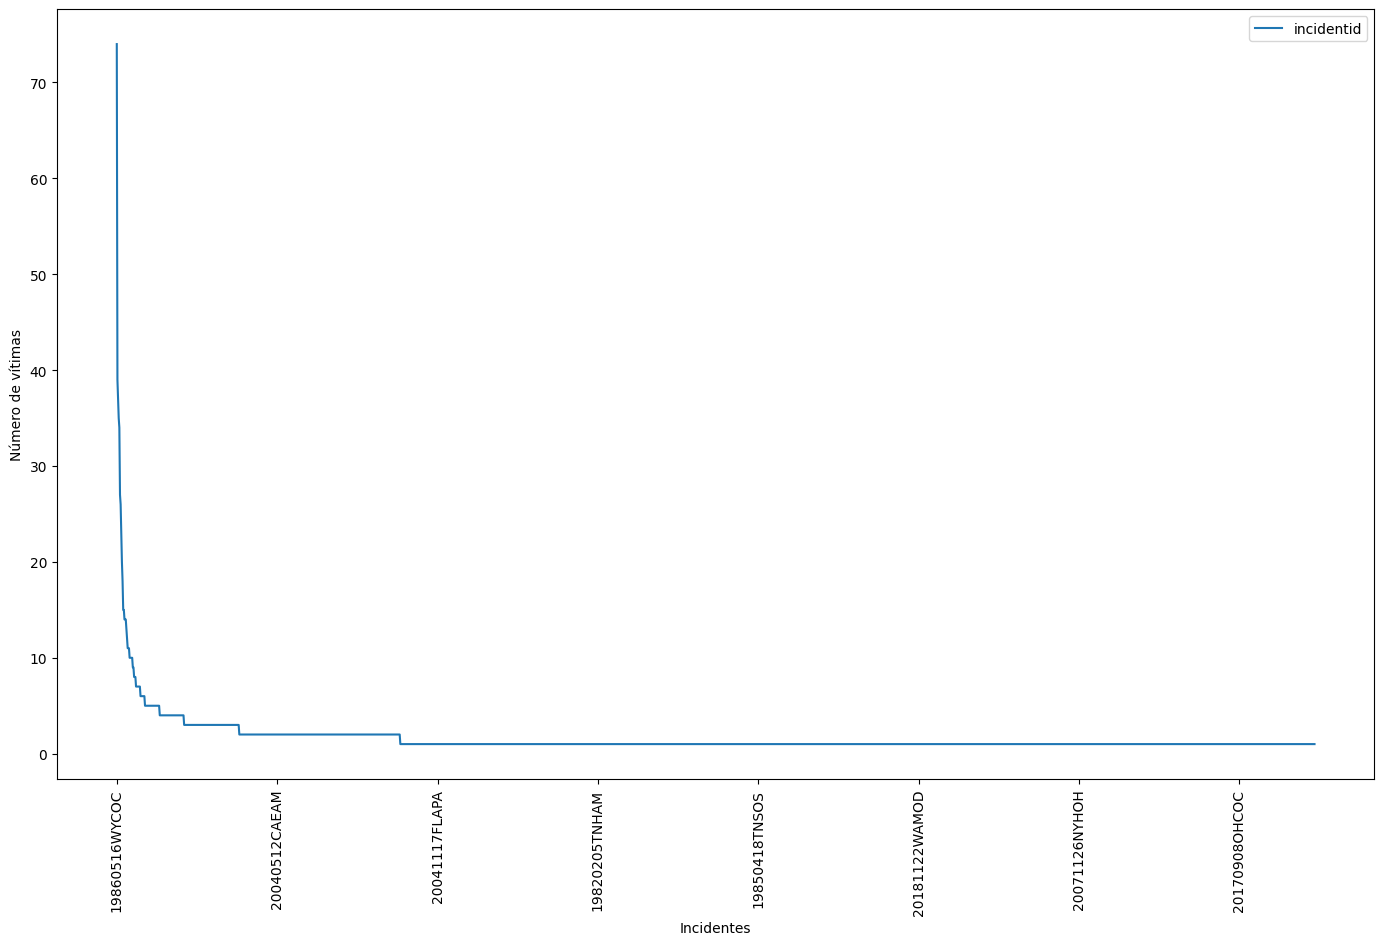

In [ ]:
victm_incid.plot(kind='line', figsize=(17,10) ,rot=90, xlabel='Incidentes', ylabel='Número de vítimas')

<Axes: xlabel='race', ylabel='count'>

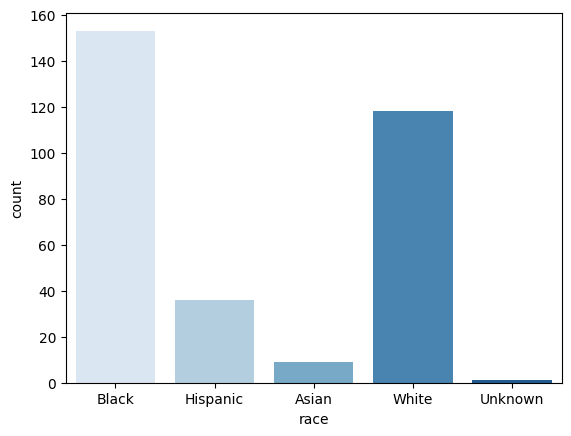

In [ ]:
sns.countplot(x=df_victm["race"], palette='Blues')

In [ ]:
# quantidade de vítimas por ano

df_incid2 = df_incid.merge(victm_incid[['Incident_ID', 'victims']], how = 'left')
df_incid2

,Incident_ID,Sources,Number_News,Media_Attention,Reliability,Date,Quarter,School,City,State,...,Barricade,Officer_Involved,Bullied,Domestic_Violence,Gang_Related,Preplanned,Shots_Fired,Active_Shooter_FBI,Year,victims
0,20220620ILGRC,https://www.cbsnews.com/chicago/news/woman-and...,50,National,4,2022-06-20,Summer,Gresham School of Excellence,Chicago,IL,...,No,No,No,No,NaN,No,100,No,2022,3.0
1,20220613WAMAE,https://www.q13fox.com/news/deputies-arrest-15...,5,Local,4,2022-06-13,Summer,Mariner High School,Everett,WA,...,No,No,No,No,NaN,No,99,No,2022,NaN
2,20220610ALBYB,https://www.actionnews5.com/2022/06/10/student...,3,Local,4,2022-06-10,Summer,Byhalia High School,Byhalia,MS,...,No,No,No,No,NaN,No,1,No,2022,NaN
3,20220609ALWAG,https://www.live5news.com/2022/06/09/potential...,100,National,4,2022-06-09,Summer,Walnut Park Elementary School,Gadsden,AL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,2022,1.0
4,20220608ARLIL,https://www.kark.com/crime/lrpd-school-bus-hit...,5,National,4,2022-06-08,Summer,Little Rock School District Bus,Little Rock,AR,...,No,No,No,No,NaN,No,99,No,2022,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2064,19700226CABAB,https://www.vvdailypress.com/story/news/crime/...,2,Local,4,1979-02-26,Winter,Barstow High School,Barstow,CA,...,No,No,Yes,No,No,Yes,6,No,1979,NaN
2065,19700206OHJOC,https://www.newspapers.com/image/18059538/?ter...,NaN,NaN,2,1970-02-06,Winter,John F. Kennedy High School,Cleveland,OH,...,No,No,No,No,No,No,4,NaN,1970,1.0
2066,19700105DCUNW,https://www.newspapers.com/image/156467116/?te...,NaN,NaN,2,1970-01-05,Winter,Unnamed High School,Washington,DC,...,No,No,No,No,No,No,2,NaN,1970,1.0
2067,19700105DCSOW,https://news.google.com/newspapers?id=AfRYAAAA...,NaN,NaN,3,1970-01-05,Winter,Sousa Junior High,Washington,DC,...,No,No,No,No,No,No,1,NaN,1970,1.0


In [ ]:
df_incid2['victims'] = df_incid2['victims'].fillna(0)

In [ ]:
df_incid2

,Incident_ID,Sources,Number_News,Media_Attention,Reliability,Date,Quarter,School,City,State,...,Barricade,Officer_Involved,Bullied,Domestic_Violence,Gang_Related,Preplanned,Shots_Fired,Active_Shooter_FBI,Year,victims
0,20220620ILGRC,https://www.cbsnews.com/chicago/news/woman-and...,50,National,4,2022-06-20,Summer,Gresham School of Excellence,Chicago,IL,...,No,No,No,No,NaN,No,100,No,2022,3.0
1,20220613WAMAE,https://www.q13fox.com/news/deputies-arrest-15...,5,Local,4,2022-06-13,Summer,Mariner High School,Everett,WA,...,No,No,No,No,NaN,No,99,No,2022,0.0
2,20220610ALBYB,https://www.actionnews5.com/2022/06/10/student...,3,Local,4,2022-06-10,Summer,Byhalia High School,Byhalia,MS,...,No,No,No,No,NaN,No,1,No,2022,0.0
3,20220609ALWAG,https://www.live5news.com/2022/06/09/potential...,100,National,4,2022-06-09,Summer,Walnut Park Elementary School,Gadsden,AL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,2022,1.0
4,20220608ARLIL,https://www.kark.com/crime/lrpd-school-bus-hit...,5,National,4,2022-06-08,Summer,Little Rock School District Bus,Little Rock,AR,...,No,No,No,No,NaN,No,99,No,2022,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2064,19700226CABAB,https://www.vvdailypress.com/story/news/crime/...,2,Local,4,1979-02-26,Winter,Barstow High School,Barstow,CA,...,No,No,Yes,No,No,Yes,6,No,1979,0.0
2065,19700206OHJOC,https://www.newspapers.com/image/18059538/?ter...,NaN,NaN,2,1970-02-06,Winter,John F. Kennedy High School,Cleveland,OH,...,No,No,No,No,No,No,4,NaN,1970,1.0
2066,19700105DCUNW,https://www.newspapers.com/image/156467116/?te...,NaN,NaN,2,1970-01-05,Winter,Unnamed High School,Washington,DC,...,No,No,No,No,No,No,2,NaN,1970,1.0
2067,19700105DCSOW,https://news.google.com/newspapers?id=AfRYAAAA...,NaN,NaN,3,1970-01-05,Winter,Sousa Junior High,Washington,DC,...,No,No,No,No,No,No,1,NaN,1970,1.0


In [ ]:
victm_incid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2074 entries, 0 to 2073
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   victims     2074 non-null   int64 
 1   incidentid  2074 non-null   object
 2   age         1710 non-null   object
dtypes: int64(1), object(2)
memory usage: 64.8+ KB


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


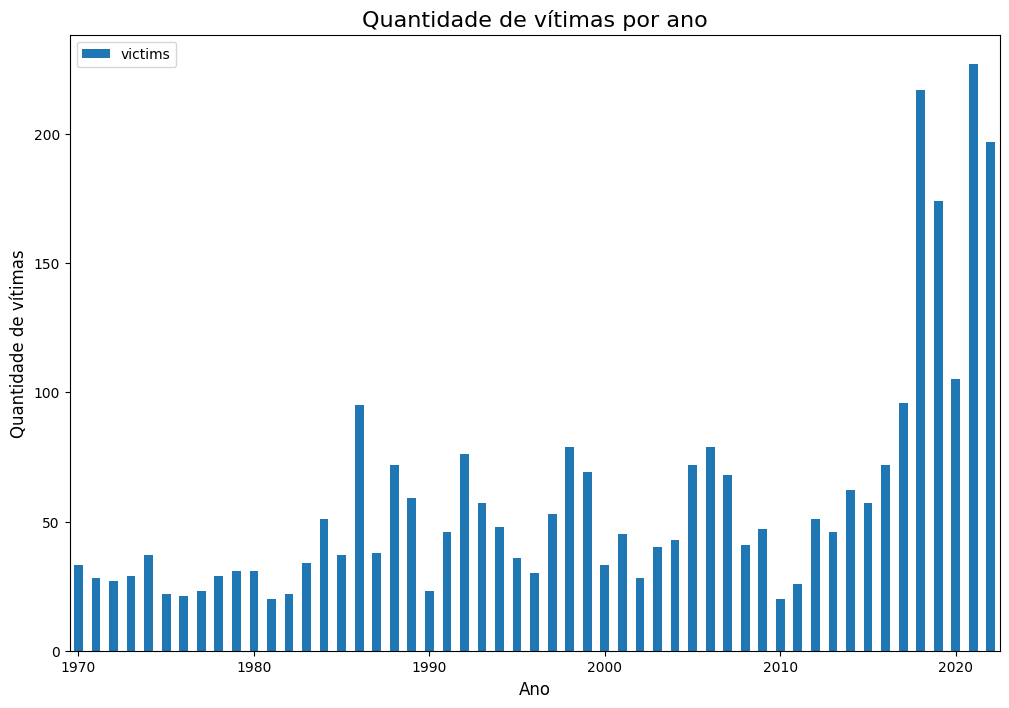

In [ ]:
victms_year = victm_incid.groupby('Year').agg({'victims':'sum'})
victms_year.plot(kind='bar', figsize=(12,8), rot=0).xaxis.set_major_locator(ticker.AutoLocator())
plt.title('Quantidade de vítimas por ano', fontsize=16) 
plt.xlabel('Ano', fontsize=12) 
plt.ylabel('Quantidade de vítimas', fontsize=12) 
plt.show()

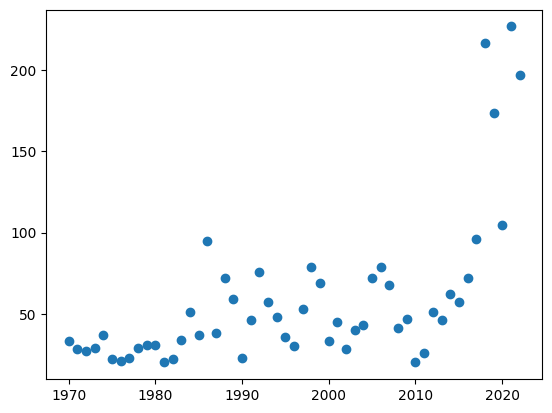

In [ ]:
plt.scatter(victms_year.index, victms_year.values)

In [ ]:
# graf_linha = sns.lineplot(data=df_victm, x='incidentid', y='', marker='o')

<Axes: >

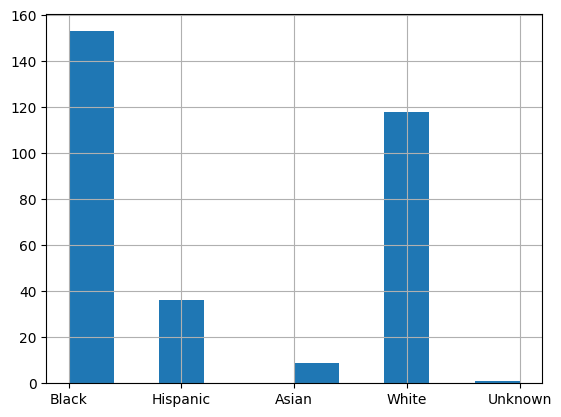

In [ ]:
df_victm['race'].hist()

Nota-se que as vítimas de raça negra estão em maior quantidade em comparação às outras raças.

<Axes: xlabel='injury', ylabel='count'>

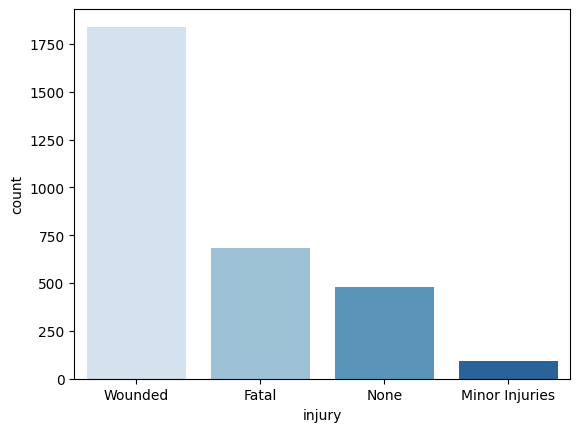

In [ ]:
sns.countplot(x=df_victm["injury"], palette='Blues')

A partir do histograma, observa-se que na maior parte dos casos existem vítimas feridas.

<Axes: xlabel='gender', ylabel='count'>

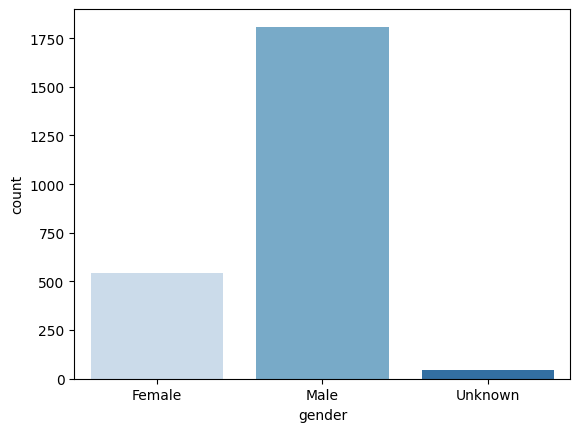

In [ ]:
sns.countplot(x=df_victm["gender"], palette='Blues')

A partir deste histograma é possível notar que o número de vítimas do sexo masculino é maior.

<Axes: >

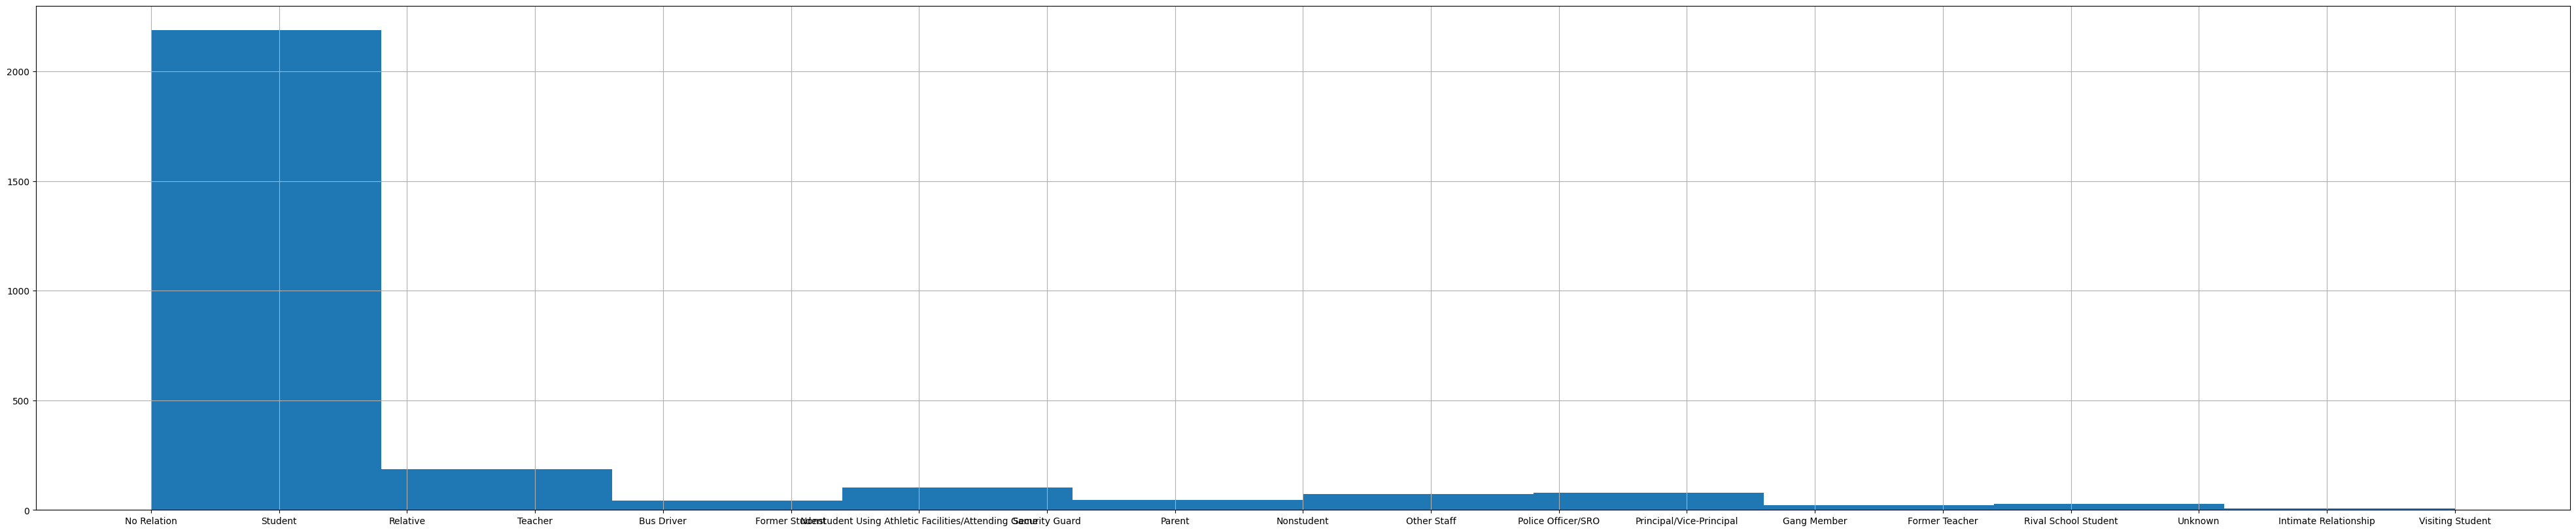

In [ ]:
fig = plt.figure(figsize=(50,10))
ax = fig.gca()
df_victm['schoolaffiliation'].hist(ax=ax)

<Axes: xlabel='count', ylabel='schoolaffiliation'>

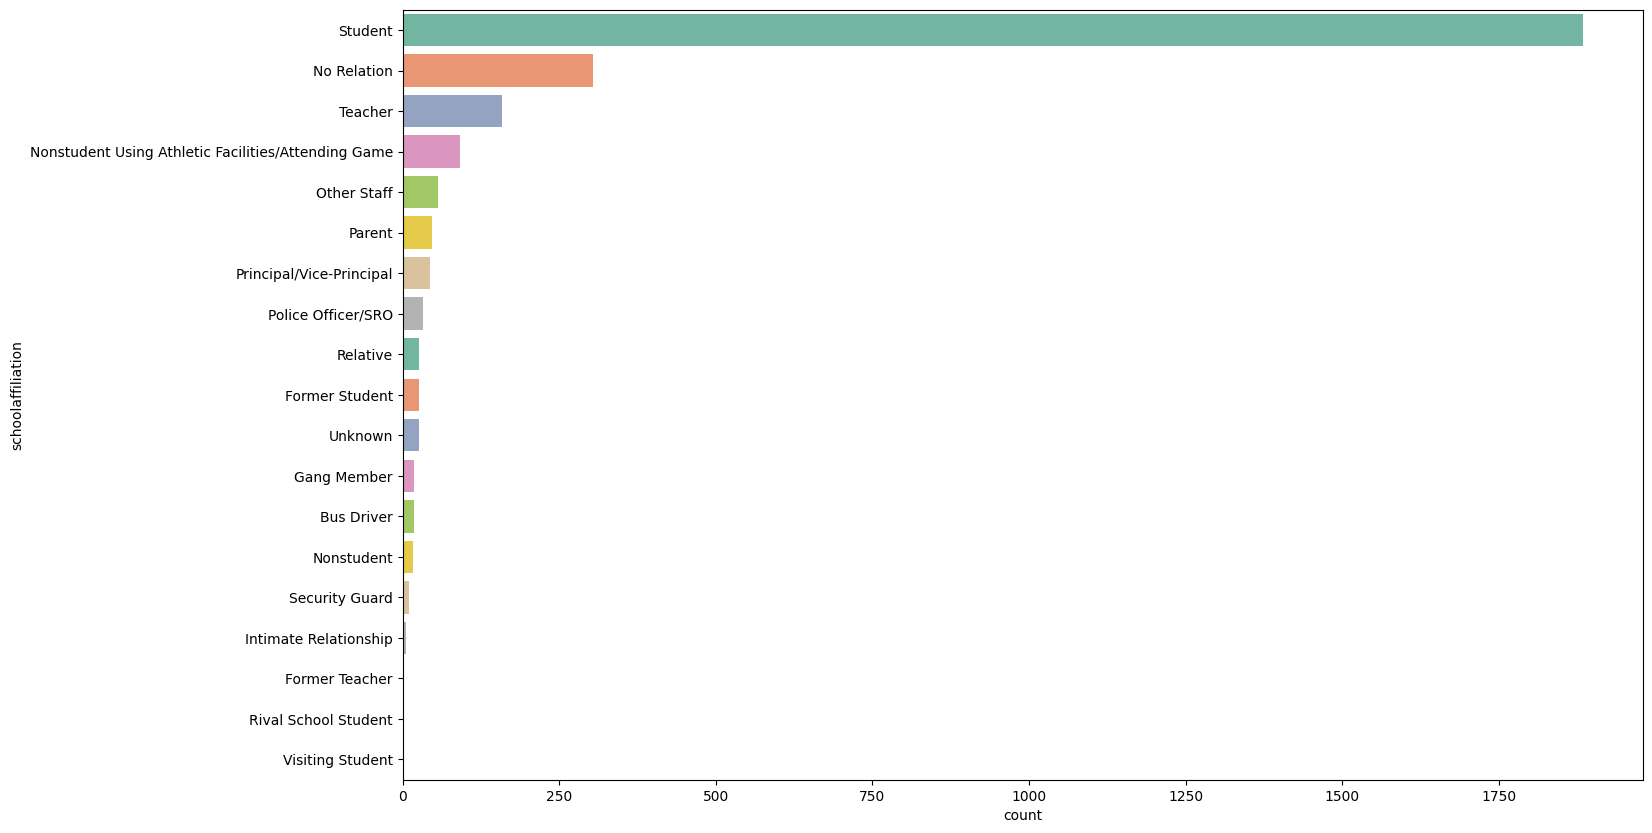

In [ ]:
fig = plt.figure(figsize=(16,10))
sns.countplot(y=df_victm["schoolaffiliation"], order=df_victm['schoolaffiliation'].value_counts(ascending=False).index, palette='Set2')

<Axes: >

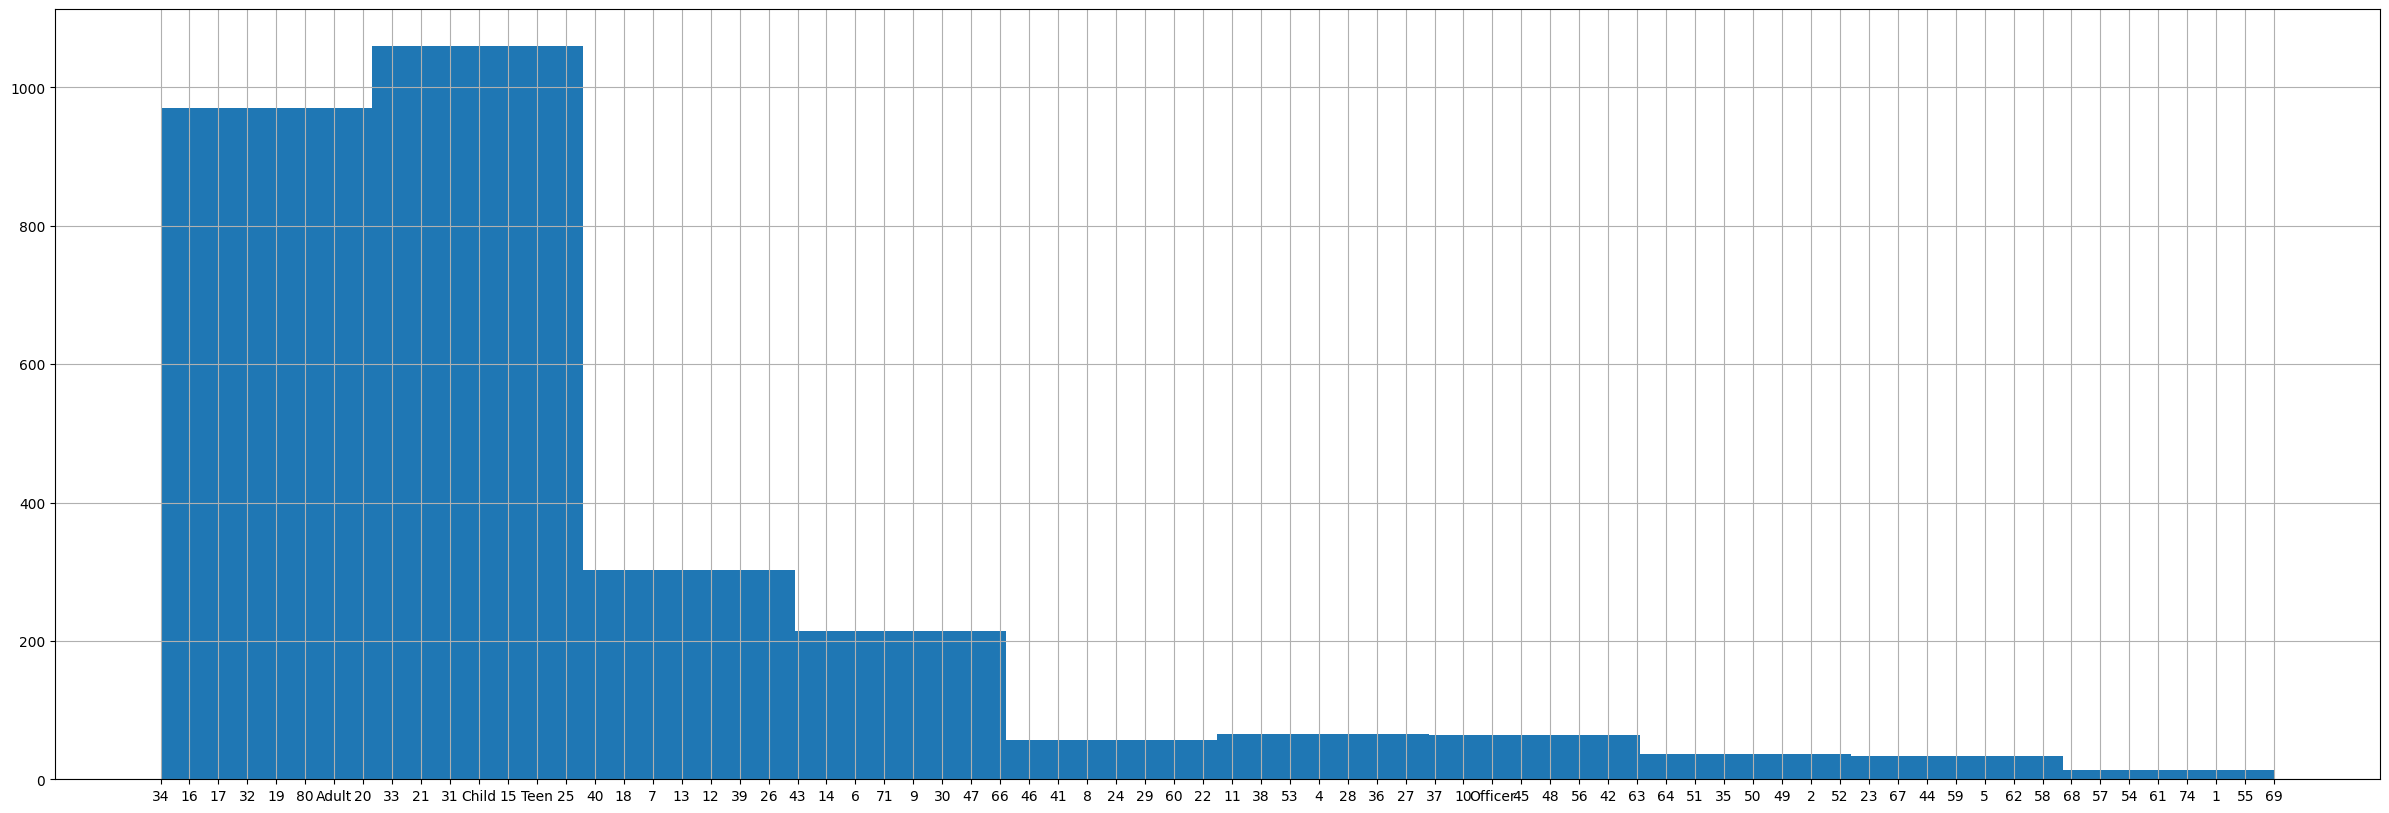

In [ ]:
fig = plt.figure(figsize=(30,10))
ax = fig.gca()
df_victm['age'].hist(ax=ax)

In [ ]:
age = df_victm['age'].sort_values().tail()

NameError: ignored

<Axes: xlabel='count', ylabel='age'>

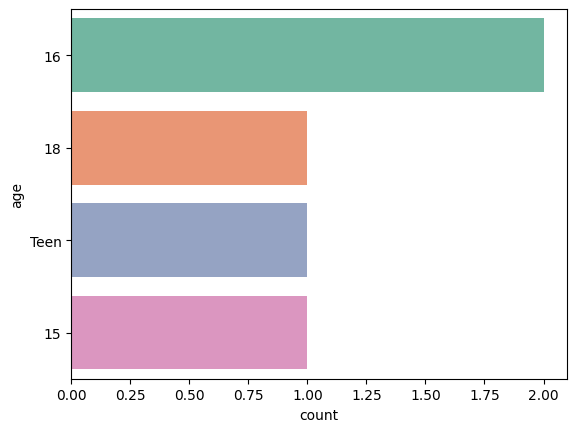

In [ ]:
sns.countplot(y=df_victm["age"].tail(), order=df_victm['age'].tail().value_counts(ascending=False).index, palette='Set2')

### <font color ="#00b8ff">3.5 Análise das Armas</font>

In [ ]:
df_weapn.head()

,incidentid,weaponcaliber,weapondetails,weapontype
0,20220620ILGRC,NaN,NaN,NaN
1,20220613WAMAE,NaN,NaN,Handgun
2,20220610ALBYB,NaN,NaN,Handgun
3,20220609ALWAG,Service Weapon,NaN,Handgun
4,20220608ARLIL,NaN,NaN,NaN


In [ ]:
df_weapn.info()

In [ ]:
df_weapn.describe()

In [ ]:
fig = plt.figure(figsize=(50,5))
ax = fig.gca()
df_weapn['weaponcaliber'].hist(ax=ax)

In [ ]:

fig = plt.figure(figsize=(50,5))
ax = fig.gca()
df_weapn['weapondetails'].hist(ax=ax)

In [ ]:
fig = plt.figure(figsize=(15,5))
ax = fig.gca()
df_weapn['weapontype'].hist(ax=ax)

### <font color ="#00b8ff">3.6 Regressão Linear</font>

In [ ]:
# incluir em df_incid quantidade de vitimas e violentadores por acidente

